# TRABAJO INTEGRADOR - DATA SCIENCE - 2022
## Tema: Créditos Prendarios

**Los objetivos identificados del negocio son los siguientes:**

- Entender el comportamiento de los clientes con el fin de que la entidad pueda generar ofertas diferenciadas, mediante una solución analítica.
- Controlar la mora, a través de la adjudicación de la joya y el entendimiento de sus clientes, mediante una solución analítica.

```

```


![Imagen](Portada.jpg)

Link del word del trabajo integrador: [Trabajo integrador](https://1drv.ms/u/s!At02E1M_3GSWdJJzazWgNuB7BO4?e=DMR1b5)


## 1. Explorando los datos de los créditos prendarios

```
```
- *Vamos a instalar los paquetes de Python que se requeriran en el presente trabajo*


In [1]:
#pip install pyreadstat 

In [2]:
#pip install pyprojroot

- *Instalaremos las librerias y se iniciara con el la exploración de los datos.*

In [3]:
#importamos librerias
import pyreadstat
import pandas as pd
from pyprojroot import here 
#from time import time, ctime
import datetime
#from janitor import clean_names
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Cargando la data
#data, meta = pyreadstat.read_sav(here('D:\DATA SCIENCE\SESIONES\PROYECTO INTEGRADOR\Proyecto_Integrador') / "Input/Credito prendario.sav")
data, meta = pyreadstat.read_sav(here() / "Input/Credito prendario.sav")

In [5]:
#revisando un caso aleatorio
#data = data[data.CodCli == 1090300005568]

In [6]:
#Mirando las variables y algunos datos de la base
data.head()

,Periodo,CodCli,Edad,Sexo,EstaCiv,TipoViv,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,FlagAtra,MaxDiasAtra,MaxGramOro,FechAnalisis,AntiDias,FlagAdj
0,200705.0,1.090300e+12,69.0,1.0,1.0,1.0,2.0,2613.74,2549.54,2736.90,551.0,2690.89,0.0,6.0,45.4166,1.341369e+10,220.0,0.0
1,200705.0,1.090300e+12,55.0,0.0,5.0,4.0,2.0,2782.07,1488.64,3051.00,1327.0,1790.80,0.0,33.0,50.6250,1.341619e+10,233.0,0.0
2,200705.0,1.090300e+12,55.0,0.0,1.0,4.0,1.0,1407.21,1205.06,1473.52,1645.0,4315.00,0.0,28.0,24.4500,1.342328e+10,327.0,0.0
3,200705.0,1.090300e+12,61.0,0.0,1.0,4.0,2.0,658.70,429.95,1095.28,424.0,399.62,1.0,28.0,12.4500,1.340729e+10,127.0,1.0
4,200705.0,1.090300e+12,59.0,0.0,5.0,4.0,2.0,2162.62,2148.78,2264.52,1213.0,1642.20,0.0,46.0,37.5750,1.342051e+10,275.0,0.0


In [7]:
#Información de las variables, para ver si existen nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961984 entries, 0 to 961983
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Periodo         961984 non-null  float64
 1   CodCli          961984 non-null  float64
 2   Edad            961984 non-null  float64
 3   Sexo            961984 non-null  float64
 4   EstaCiv         961984 non-null  float64
 5   TipoViv         961984 non-null  float64
 6   CantCred        961984 non-null  float64
 7   Desem           961984 non-null  float64
 8   SalVigSol       961984 non-null  float64
 9   Monto_Tasación  961984 non-null  float64
 10  DiasEfec        961984 non-null  float64
 11  MaxDeuda        961984 non-null  float64
 12  FlagAtra        961984 non-null  float64
 13  MaxDiasAtra     961984 non-null  float64
 14  MaxGramOro      961984 non-null  float64
 15  FechAnalisis    961984 non-null  float64
 16  AntiDias        961984 non-null  float64
 17  FlagAdj   

In [8]:
# No hay no nulos

In [9]:
#Diccionario
'''
Periodo	Periodo
CodCli	Código de Cliente
Edad	Edad
Sexo	Sexo
EstaCiv	Estado civil
TipoViv	Tipo de vivienda
CantCred	Cantidad de créditos
Desem	Desembolso
SalVigSol	Saldo vigente en soles
Monto_Tasación	Monto de tasación
DiasEfec	Dias efectivos
MaxDeuda	Máxima deuda
FlagAtra	Flag de dias de atraso
MaxDiasAtra	Maximo dias de atraso
MaxGramOro	Maximo gramo en oro
FechAnalisis	Fecha de analisis
AntiDias	Antiguedad en dias
FlagAdj	Falg adjudicación'''

'\nPeriodo\tPeriodo\nCodCli\tCódigo de Cliente\nEdad\tEdad\nSexo\tSexo\nEstaCiv\tEstado civil\nTipoViv\tTipo de vivienda\nCantCred\tCantidad de créditos\nDesem\tDesembolso\nSalVigSol\tSaldo vigente en soles\nMonto_Tasación\tMonto de tasación\nDiasEfec\tDias efectivos\nMaxDeuda\tMáxima deuda\nFlagAtra\tFlag de dias de atraso\nMaxDiasAtra\tMaximo dias de atraso\nMaxGramOro\tMaximo gramo en oro\nFechAnalisis\tFecha de analisis\nAntiDias\tAntiguedad en dias\nFlagAdj\tFalg adjudicación'

In [10]:
# Obtener variables númericas
num_cols = [i for i in data.columns 
            if ((data[i].dtype == float) | (data[i].dtype == np.int64))]

print(num_cols)

['Periodo', 'CodCli', 'Edad', 'Sexo', 'EstaCiv', 'TipoViv', 'CantCred', 'Desem', 'SalVigSol', 'Monto_Tasación', 'DiasEfec', 'MaxDeuda', 'FlagAtra', 'MaxDiasAtra', 'MaxGramOro', 'FechAnalisis', 'AntiDias', 'FlagAdj']


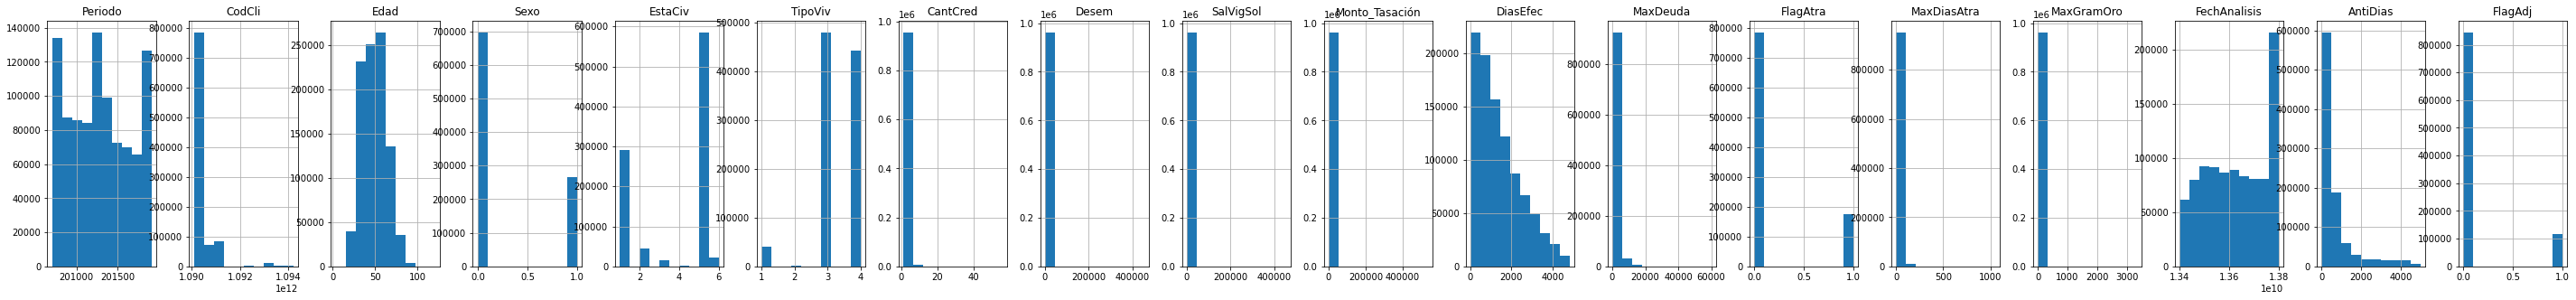

In [11]:
plt.rcParams['figure.figsize'] = [50,5] ## ajustar la grafica al tamaño 10,4
data[num_cols].hist(layout = (1,18))
plt.show()
plt.rcParams['figure.figsize'] = [6.4, 4.8] 

In [12]:
data.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))  ## describe las variables

,count,mean,std,min,25%,50%,75%,max
Periodo,961984.00,201286.78,358.53,200705.00,201003.00,201302.00,201604.00,201912.00
CodCli,961984.00,1090327278735.55,494787275.28,1090100000043.00,1090100340197.00,1090100829692.00,1090400019861.00,1094200000159.00
Edad,961984.00,49.32,14.01,4.00,38.00,49.00,59.00,121.00
Sexo,961984.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00
EstaCiv,961984.00,3.64,1.87,1.00,1.00,5.00,5.00,6.00
TipoViv,961984.00,3.37,0.70,1.00,3.00,3.00,4.00,4.00
CantCred,961984.00,1.46,1.09,1.00,1.00,1.00,2.00,56.00
Desem,961984.00,1321.89,2253.26,0.00,402.52,765.00,1496.00,455218.04
SalVigSol,961984.00,1141.98,2106.71,0.00,324.41,630.00,1275.98,455218.04
Monto_Tasación,961984.00,1534.60,2538.67,48.60,475.20,897.60,1740.00,535552.80


In [13]:
#Para agregar porcentajes

def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

'\n1: La caja se adjudica la joya (Se queda con el bien del cliente)  -->  87.8%\n0: La caja no se adjudica la joya (Devuelve el bien al cliente)  -->    12.2%\n\n'

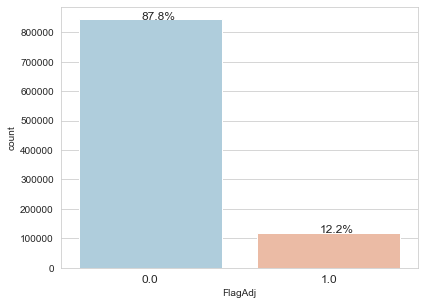

In [14]:
# Analizando la variable que representa el Tarjet del negocio (FlagAdj)

sns.set_style('whitegrid')
ax=sns.countplot(x='FlagAdj',data=data,palette='RdBu_r')

plt.xticks(size=12)

without_hue(ax,data.FlagAdj)

'''
1: La caja se adjudica la joya (Se queda con el bien del cliente)  -->  87.8%
0: La caja no se adjudica la joya (Devuelve el bien al cliente)  -->    12.2%

'''


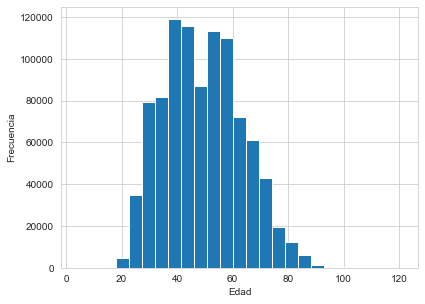

In [15]:
# Analizando la Edad

data['Edad'].hist(bins=25) 
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


<AxesSubplot:xlabel='Edad'>

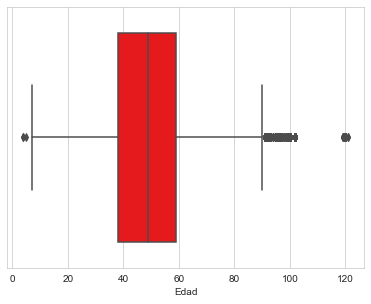

In [16]:
sns.boxplot(x="Edad",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

'\n#EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO\n'

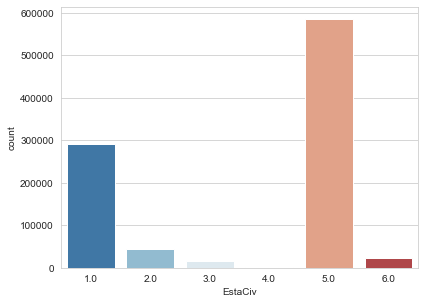

In [17]:
# EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO
sns.set_style('whitegrid')
sns.countplot(x='EstaCiv',data=data,palette='RdBu_r')

'''
#EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO
'''


'\n#EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO\n'

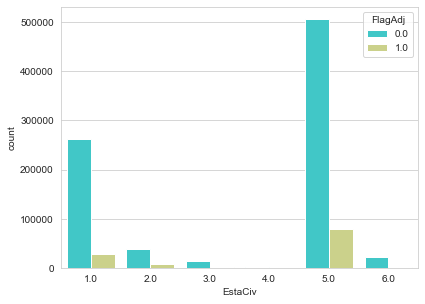

In [18]:
# Analisis de Estado civil vs Adjudicación de la Joya

sns.set_style('whitegrid')
sns.countplot(x='EstaCiv',hue='FlagAdj',data=data,palette='rainbow')


'''
#EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO
'''


'\nTipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA\n'

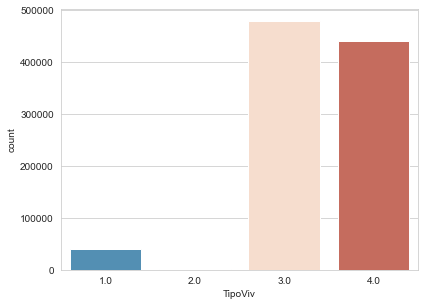

In [19]:
# TipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA
sns.set_style('whitegrid')
sns.countplot(x='TipoViv',data=data,palette='RdBu_r')

'''
TipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA
'''


'\nTipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA\n'

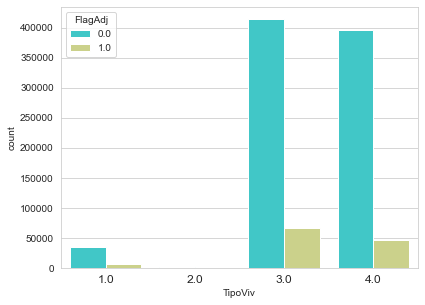

In [20]:
# Analisis de tipo de vivienda vs Adjudicación de la Joya

sns.set_style('whitegrid')
ax=sns.countplot(x='TipoViv',hue='FlagAdj',data=data,palette='rainbow')

plt.xticks(size=12)

'''
TipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA
'''


<AxesSubplot:xlabel='Sexo', ylabel='count'>

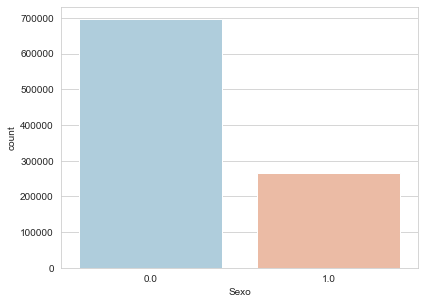

In [21]:
# Sexo 0: Mujer, 1: Hombre
sns.set_style('whitegrid')
sns.countplot(x='Sexo',data=data,palette='RdBu_r')

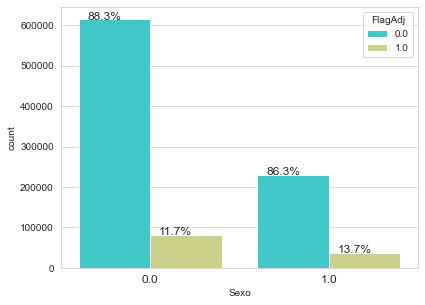

In [22]:
# Analisis Sexo vs Adjudicación de la Joya

sns.set_style('whitegrid')
ax= sns.countplot(x='Sexo',hue='FlagAdj',data=data,palette='rainbow')

'''
1: Hombre
0: Mujer
'''

plt.xticks(size=12)

with_hue(ax,data.Sexo,2,2)

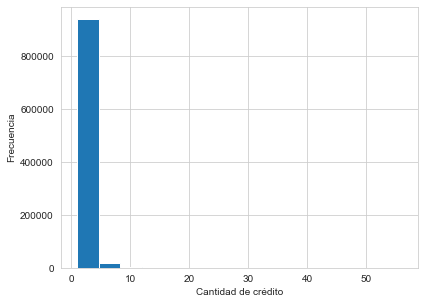

In [23]:
# Analizando la Cantidad de Credito (CantCred)

#sns.distplot(data['CantCred'].dropna(),kde=False,color='darkred',bins=80)

data['CantCred'].hist(bins=15) 
plt.xlabel("Cantidad de crédito")
plt.ylabel("Frecuencia")
plt.show()



<AxesSubplot:xlabel='CantCred'>

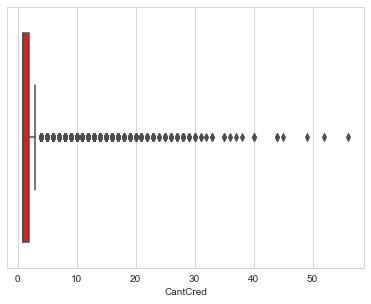

In [24]:
# Gráfico de caja:

sns.boxplot(x="CantCred",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")


In [25]:
 #Intervalo de cantidad de credito
import math

k = 1 + 3.322 * math.log10(len(data['CantCred']))
periodos = math.ceil(k)

inf = data['CantCred'].min()        # Limite inferior del primer intervalo
dif = data['CantCred'].max()
sup = data['CantCred'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['CantCred'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[1.0, 3.75)",919008,2.375,1.00,3.75
"[3.75, 6.5)",35869,5.125,3.75,6.50
"[6.5, 9.25)",5216,7.875,6.50,9.25
"[9.25, 12.0)",1094,10.625,9.25,12.00
"[12.0, 14.75)",503,13.375,12.00,14.75
"[14.75, 17.5)",153,16.125,14.75,17.50
"[17.5, 20.25)",49,18.875,17.50,20.25
"[20.25, 23.0)",20,21.625,20.25,23.00
"[23.0, 25.75)",21,24.375,23.00,25.75


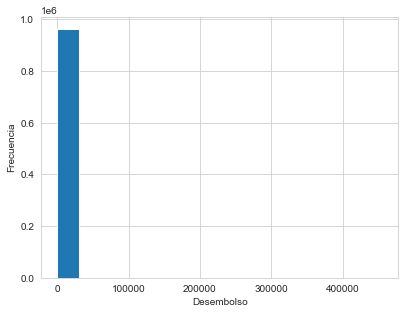

In [26]:
# Analizando el desembolso (Desem)

#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['Desem'].hist(bins=15) 
plt.xlabel("Desembolso")
plt.ylabel("Frecuencia")
plt.show()


<AxesSubplot:xlabel='Desem'>

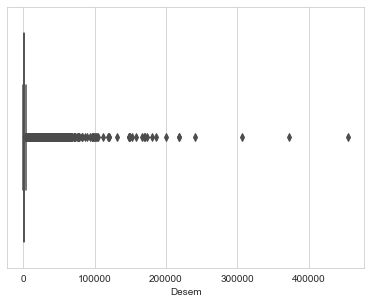

In [27]:
sns.boxplot(x="Desem",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [28]:
# Intervalo de Desem
import math

k = 1 + 3.322 * math.log10(len(data['Desem']))
periodos = math.ceil(k)

inf = data['Desem'].min()        # Limite inferior del primer intervalo
dif = data['Desem'].max()
sup = data['Desem'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['Desem'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[0.0, 22760.902)",960982,11380.451,0.000,22760.902
"[22760.902, 45521.804)",824,34141.353,22760.902,45521.804
"[45521.804, 68282.70599999999)",125,56902.255,45521.804,68282.706
"[68282.70599999999, 91043.608)",19,79663.157,68282.706,91043.608
"[91043.608, 113804.51)",11,102424.059,91043.608,113804.510
"[113804.51, 136565.41199999998)",4,125184.961,113804.510,136565.412
"[136565.41199999998, 159326.31399999998)",6,147945.863,136565.412,159326.314
"[159326.31399999998, 182087.216)",5,170706.765,159326.314,182087.216
"[182087.216, 204848.118)",2,193467.667,182087.216,204848.118


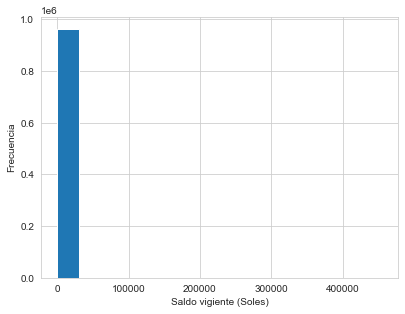

In [29]:
# Analizando el Saldo vigiente (SalVigSol)

#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['SalVigSol'].hist(bins=15) 
plt.xlabel("Saldo vigiente (Soles)")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='SalVigSol'>

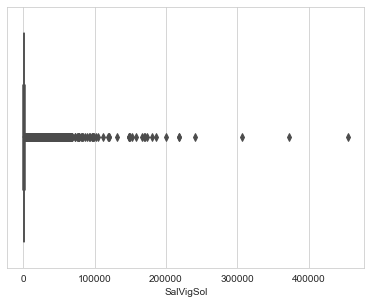

In [30]:
sns.boxplot(x="SalVigSol",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [31]:
# Intervalo de Saldo vigiente
import math


k = 1 + 3.322 * math.log10(len(data['SalVigSol']))
periodos = math.ceil(k)

inf = data['SalVigSol'].min()        # Limite inferior del primer intervalo
dif = data['SalVigSol'].max()
sup = data['SalVigSol'].max()   # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['SalVigSol'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[0.0, 22760.902)",961161,11380.451,0.000,22760.902
"[22760.902, 45521.804)",673,34141.353,22760.902,45521.804
"[45521.804, 68282.70599999999)",101,56902.255,45521.804,68282.706
"[68282.70599999999, 91043.608)",16,79663.157,68282.706,91043.608
"[91043.608, 113804.51)",10,102424.059,91043.608,113804.510
"[113804.51, 136565.41199999998)",4,125184.961,113804.510,136565.412
"[136565.41199999998, 159326.31399999998)",6,147945.863,136565.412,159326.314
"[159326.31399999998, 182087.216)",5,170706.765,159326.314,182087.216
"[182087.216, 204848.118)",2,193467.667,182087.216,204848.118


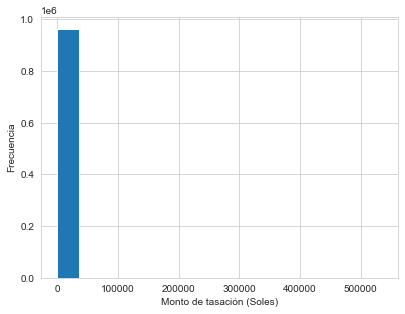

In [32]:
# Analizando el Monto de tasación
#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['Monto_Tasación'].hist(bins=15) 
plt.xlabel("Monto de tasación (Soles)")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='Monto_Tasación'>

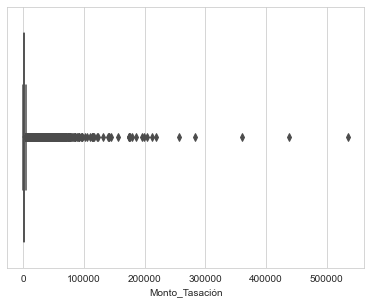

In [33]:
sns.boxplot(x="Monto_Tasación",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [34]:
# Intervalo de monto de tasación
import math


k = 1 + 3.322 * math.log10(len(data['Monto_Tasación']))
periodos = math.ceil(k)

inf = data['Monto_Tasación'].min()       # Limite inferior del primer intervalo
dif = data['Monto_Tasación'].max()
sup = data['Monto_Tasación'].max()    # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['Monto_Tasación'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[48.6, 26823.809999999998)",961192,13436.205,48.60,26823.81
"[26823.809999999998, 53599.02)",651,40211.415,26823.81,53599.02
"[53599.02, 80374.23000000001)",91,66986.625,53599.02,80374.23
"[80374.23000000001, 107149.44)",20,93761.835,80374.23,107149.44
"[107149.44, 133924.65)",9,120537.045,107149.44,133924.65
"[133924.65, 160699.86000000002)",5,147312.255,133924.65,160699.86
"[160699.86000000002, 187475.07)",6,174087.465,160699.86,187475.07
"[187475.07, 214250.28)",4,200862.675,187475.07,214250.28
"[214250.28, 241025.49)",1,227637.885,214250.28,241025.49


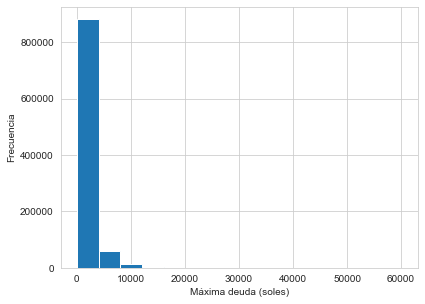

In [35]:
# Analizando maxima deunda
#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['MaxDeuda'].hist(bins=15) 
plt.xlabel("Máxima deuda (soles)")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='MaxDeuda'>

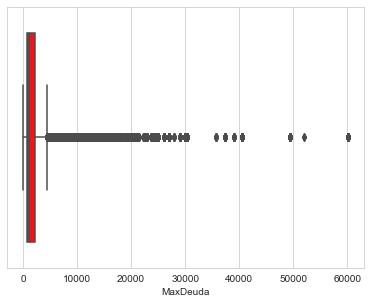

In [36]:
sns.boxplot(x="MaxDeuda",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [37]:
# Intervalo de maxima deuda
import math


k = 1 + 3.322 * math.log10(len(data['MaxDeuda']))
periodos = math.ceil(k)

inf = data['MaxDeuda'].min()       # Limite inferior del primer intervalo
dif = data['MaxDeuda'].max()
sup = data['MaxDeuda'].max()    # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['MaxDeuda'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[50.0, 3053.525)",826670,1551.7625,50.000,3053.525
"[3053.525, 6057.05)",97520,4555.2875,3053.525,6057.050
"[6057.05, 9060.575)",20301,7558.8125,6057.050,9060.575
"[9060.575, 12064.1)",10602,10562.3375,9060.575,12064.100
"[12064.1, 15067.625)",4052,13565.8625,12064.100,15067.625
"[15067.625, 18071.15)",1065,16569.3875,15067.625,18071.150
"[18071.15, 21074.675)",523,19572.9125,18071.150,21074.675
"[21074.675, 24078.2)",235,22576.4375,21074.675,24078.200
"[24078.2, 27081.725000000002)",521,25579.9625,24078.200,27081.725


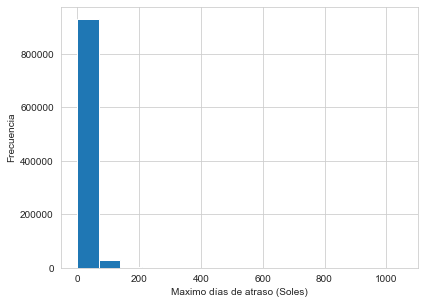

In [38]:
# Analizando maximo dias de atraso
#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['MaxDiasAtra'].hist(bins=15) 
plt.xlabel("Maximo días de atraso (Soles)")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='MaxDiasAtra'>

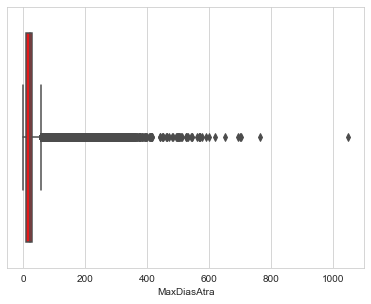

In [39]:
sns.boxplot(x="MaxDiasAtra",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [40]:
# Intervalo de maxima dias de atraso
import math


k = 1 + 3.322 * math.log10(len(data['MaxDiasAtra']))
periodos = math.ceil(k)

inf = data['MaxDiasAtra'].min()       # Limite inferior del primer intervalo
dif = data['MaxDiasAtra'].max()
sup = data['MaxDiasAtra'].max()      # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['MaxDiasAtra'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[0.0, 52.5)",893221,26.25,0.0,52.5
"[52.5, 105.0)",58205,78.75,52.5,105.0
"[105.0, 157.5)",8016,131.25,105.0,157.5
"[157.5, 210.0)",1676,183.75,157.5,210.0
"[210.0, 262.5)",525,236.25,210.0,262.5
"[262.5, 315.0)",176,288.75,262.5,315.0
"[315.0, 367.5)",90,341.25,315.0,367.5
"[367.5, 420.0)",32,393.75,367.5,420.0
"[420.0, 472.5)",9,446.25,420.0,472.5


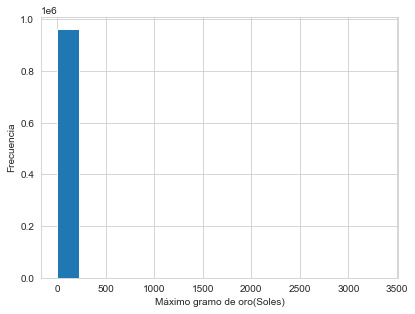

In [41]:
# Analizando maximo gramo de oro
#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['MaxGramOro'].hist(bins=15) 
plt.xlabel("Máximo gramo de oro(Soles)")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='MaxGramOro'>

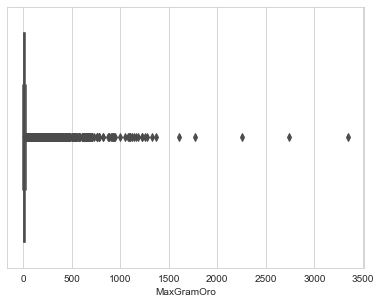

In [42]:
sns.boxplot(x="MaxGramOro",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [43]:
# Intervalo de maxima dias de atraso
import math


k = 1 + 3.322 * math.log10(len(data['MaxGramOro']))
periodos = math.ceil(k)

inf = data['MaxGramOro'].min()       # Limite inferior del primer intervalo
dif = data['MaxGramOro'].max()
sup = data['MaxGramOro'].max()     # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['MaxGramOro'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[0.45, 167.78775000000002)",960732,84.118875,0.45000,167.78775
"[167.78775000000002, 335.12550000000005)",1046,251.456625,167.78775,335.12550
"[335.12550000000005, 502.4632500000001)",95,418.794375,335.12550,502.46325
"[502.4632500000001, 669.8010000000002)",48,586.132125,502.46325,669.80100
"[669.8010000000002, 837.1387500000002)",28,753.469875,669.80100,837.13875
"[837.1387500000002, 1004.4765000000002)",14,920.807625,837.13875,1004.47650
"[1004.4765000000002, 1171.8142500000001)",9,1088.145375,1004.47650,1171.81425
"[1171.8142500000001, 1339.1520000000003)",6,1255.483125,1171.81425,1339.15200
"[1339.1520000000003, 1506.4897500000004)",1,1422.820875,1339.15200,1506.48975


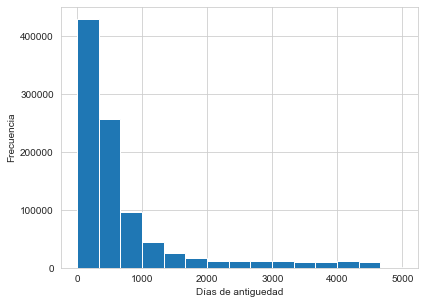

In [44]:
# Analizando días de antiguedad

data['AntiDias'].hist(bins=15) 
plt.xlabel("Días de antiguedad")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='AntiDias'>

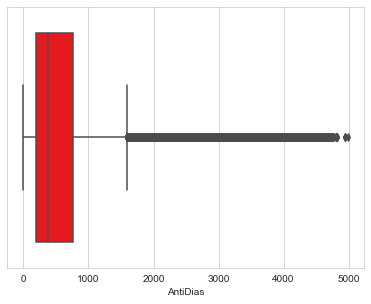

In [45]:
sns.boxplot(x="AntiDias",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [46]:
# Intervalo de maxima dias de antiguedad
import math


k = 1 + 3.322 * math.log10(len(data['AntiDias']))
periodos = math.ceil(k)

inf = data['AntiDias'].min()        # Limite inferior del primer intervalo
dif = data['AntiDias'].max()
sup = data['AntiDias'].max()  # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['AntiDias'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[0.0, 249.55)",314703,124.775,0.00,249.55
"[249.55, 499.1)",280165,374.325,249.55,499.10
"[499.1, 748.6500000000001)",123458,623.875,499.10,748.65
"[748.6500000000001, 998.2)",63692,873.425,748.65,998.20
"[998.2, 1247.75)",35497,1122.975,998.20,1247.75
"[1247.75, 1497.3000000000002)",22935,1372.525,1247.75,1497.30
"[1497.3000000000002, 1746.8500000000001)",16697,1622.075,1497.30,1746.85
"[1746.8500000000001, 1996.4)",12371,1871.625,1746.85,1996.40
"[1996.4, 2245.9500000000003)",10407,2121.175,1996.40,2245.95


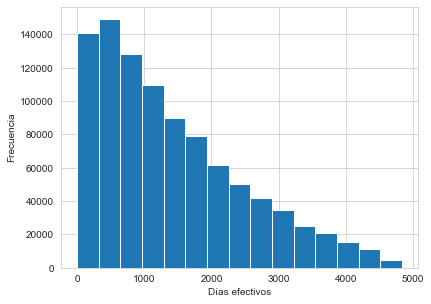

In [47]:
# Analizando días efectivos
#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['DiasEfec'].hist(bins=15) 
plt.xlabel("Días efectivos")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='DiasEfec'>

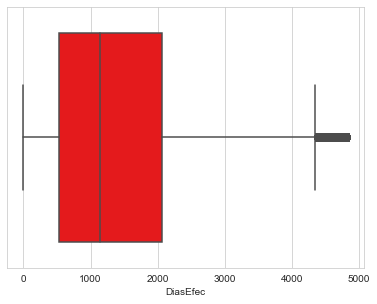

In [48]:
sns.boxplot(x="DiasEfec",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [49]:
# Intervalo de maxima dias efectivos
import math


k = 1 + 3.322 * math.log10(len(data['DiasEfec']))
periodos = math.ceil(k)

inf = data['DiasEfec'].min()        # Limite inferior del primer intervalo
dif = data['DiasEfec'].max()
sup = data['DiasEfec'].max()  # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['DiasEfec'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[1.0, 242.65)",102633,121.825,1.00,242.65
"[242.65, 484.3)",116798,363.475,242.65,484.30
"[484.3, 725.95)",103662,605.125,484.30,725.95
"[725.95, 967.6)",94839,846.775,725.95,967.60
"[967.6, 1209.25)",83476,1088.425,967.60,1209.25
"[1209.25, 1450.9)",73045,1330.075,1209.25,1450.90
"[1450.9, 1692.55)",63801,1571.725,1450.90,1692.55
"[1692.55, 1934.2)",58203,1813.375,1692.55,1934.20
"[1934.2, 2175.85)",48065,2055.025,1934.20,2175.85


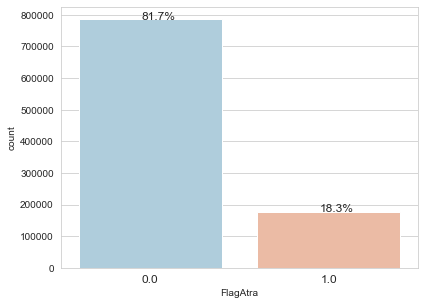

In [50]:
# Flag de atrasos

sns.set_style('whitegrid')
ax=sns.countplot(x='FlagAtra',data=data,palette='RdBu_r')

plt.xticks(size=12)

without_hue(ax,data.FlagAtra)

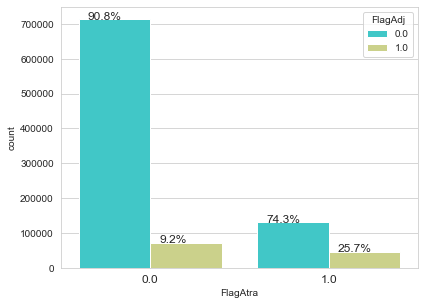

In [51]:
# Flag de atrasos vs flag de adjudicación

sns.set_style('whitegrid')
ax= sns.countplot(x='FlagAtra',hue='FlagAdj',data=data,palette='rainbow')

plt.xticks(size=12)

with_hue(ax,data.FlagAtra,2,2)

In [52]:
# Analizaremos el ratio de desembolso:

# No se debería de desembolsar mas del monto de tasación, es una regla de la Caja de creditos prendarios.

data['ratio_desem_tasa'] = data['Desem']/data['Monto_Tasación']

# data.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))  ## describe las variables

C:\Users\Mauro\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ratio_desem_tasa'>

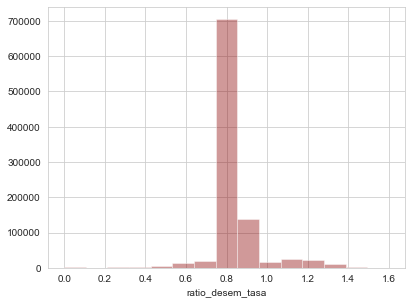

In [53]:
sns.distplot(data['ratio_desem_tasa'].dropna(),kde=False,color='darkred',bins=15)

Luego de analizar la data graficamente y con algunos indicadores, se evidencia incosistencia en los datos y datos atipos.

## 2. Transformando los datos



- *De la visulizaciín grafica y la revisión de las varaibles, se ha identificado datos atipicos den la base, por lo que se procedera a eliminarlos.*

    Las etiqueta de las variables son las siguientes:

    - Sexo 0: Mujer, 1: Hombre
    - EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO
    - TipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA
    - FlagAdj 0: Pagó a tiempo y la caja no se adjudico el bien prendario, 1: La caja de adjudicó el bien prendario


In [54]:
#Eliminar los casos con Edad menor a 18 años:
data = data[data.Edad >= 18]

In [55]:
#Eliminar los casos con desembolso=0:
data = data[data.Desem > 0]

In [56]:
#Estableciendo un umbral al ratio de desembolso y tasación, en clase el profesor
#Chincaro nos indicó 0.99 para no eliminar mucha información
#data['ratio_desem_tasa'] = data['Desem']/data['Monto_Tasación']
data = data[data.ratio_desem_tasa <= 0.99]

In [57]:
#Editando variables de tiempo
data['t_Periodo'] = pd.to_datetime(data['Periodo'], format='%Y%m')

In [58]:
#Eliminando variables de no interés
del data['ratio_desem_tasa'],data['FlagAtra'],data['Periodo']

#data['t_Periodo'], data['CodCli'], data['FechAnalisis']

In [59]:
data.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))  ## describe las variables

,count,mean,std,min,25%,50%,75%,max
CodCli,887455.00,1090319543962.72,473506820.08,1090100000043.00,1090100334341.00,1090100817058.00,1090400011371.00,1094200000159.00
Edad,887455.00,49.54,13.98,19.00,38.00,49.00,60.00,121.00
Sexo,887455.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00
EstaCiv,887455.00,3.63,1.87,1.00,1.00,5.00,5.00,6.00
TipoViv,887455.00,3.37,0.70,1.00,3.00,3.00,4.00,4.00
CantCred,887455.00,1.45,1.09,1.00,1.00,1.00,2.00,56.00
Desem,887455.00,1265.23,2118.05,40.00,397.09,740.00,1437.43,455218.04
SalVigSol,887455.00,1090.63,1986.77,0.00,313.67,606.28,1224.00,455218.04
Monto_Tasación,887455.00,1522.69,2536.81,48.60,470.00,886.20,1725.50,535552.80
DiasEfec,887455.00,1450.50,1092.69,1.00,562.00,1188.00,2114.00,4834.00


In [60]:
#Dicotomizando
#EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO
data['EstaCiv_cas'] = data['EstaCiv']
data['EstaCiv_con'] = data['EstaCiv']
data['EstaCiv_div'] = data['EstaCiv']
data['EstaCiv_sep'] = data['EstaCiv']
data['EstaCiv_sol'] = data['EstaCiv']
data.replace(to_replace={"EstaCiv_cas": {2:0,3:0,4:0,5:0,6:0},"EstaCiv_con": {1:0,2:1,3:0,4:0,5:0,6:0},"EstaCiv_div": {1:0,2:0,3:1,4:0,5:0,6:0},"EstaCiv_sep": {1:0,2:0,3:0,4:1,5:0,6:0},"EstaCiv_sol": {1:0,2:0,3:0,4:0,5:1,6:0}},inplace=True)

#TipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA
data['TipoViv_alq'] = data['TipoViv']
data['TipoViv_def'] = data['TipoViv']
data['TipoViv_pro'] = data['TipoViv']
data.replace(to_replace={"TipoViv_alq": {2:0,3:0,4:0},"TipoViv_def": {1:0,2:0,3:1,4:0},"TipoViv_pro": {1:0,2:0,3:0,4:1}},inplace=True)

#Eliminando variables de no interés
del data['EstaCiv'],data['TipoViv']

In [61]:
data.head()

,CodCli,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,...,FlagAdj,t_Periodo,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro
0,1.090300e+12,69.0,1.0,2.0,2613.74,2549.54,2736.90,551.0,2690.89,6.0,...,0.0,2007-05-01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.090300e+12,55.0,0.0,2.0,2782.07,1488.64,3051.00,1327.0,1790.80,33.0,...,0.0,2007-05-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.090300e+12,55.0,0.0,1.0,1407.21,1205.06,1473.52,1645.0,4315.00,28.0,...,0.0,2007-05-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.090300e+12,61.0,0.0,2.0,658.70,429.95,1095.28,424.0,399.62,28.0,...,1.0,2007-05-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.090300e+12,59.0,0.0,2.0,2162.62,2148.78,2264.52,1213.0,1642.20,46.0,...,0.0,2007-05-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [62]:
# Nos quedaremos con los ultimos registros de cada cliente, con el fin de contar con un único registro por cliente.
data_last=data.drop_duplicates(subset=['CodCli'], keep='last')

In [63]:
data_last.head(100)

,CodCli,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,...,FlagAdj,t_Periodo,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro
6,1.090300e+12,66.0,0.0,1.0,561.16,277.03,587.60,77.0,527.90,21.0,...,0.0,2007-05-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31,1.090300e+12,67.0,0.0,1.0,335.22,331.66,351.02,181.0,315.35,21.0,...,0.0,2007-05-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
47,1.090300e+12,56.0,0.0,1.0,180.12,176.69,188.61,123.0,178.73,8.0,...,0.0,2007-05-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
113,1.090200e+12,59.0,0.0,1.0,107.92,107.92,113.00,14.0,104.89,2.0,...,0.0,2007-05-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
180,1.090300e+12,50.0,1.0,1.0,308.95,308.95,393.24,16.0,300.27,12.0,...,0.0,2007-05-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,1.090100e+12,75.0,0.0,1.0,355.68,29.21,592.80,292.0,334.60,3.0,...,0.0,2007-05-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2459,1.090100e+12,66.0,0.0,1.0,224.20,177.64,448.40,361.0,210.91,20.0,...,1.0,2007-05-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2504,1.090100e+12,52.0,0.0,1.0,7653.33,7653.33,8013.96,31.0,7199.75,45.0,...,1.0,2007-05-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2509,1.090100e+12,56.0,0.0,1.0,241.73,238.28,253.12,91.0,767.49,24.0,...,1.0,2007-05-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
data_last.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))  ## describe las variables

,count,mean,std,min,25%,50%,75%,max
CodCli,41476.00,1090409967312.84,605335003.27,1090100000043.00,1090100547649.50,1090101354302.50,1090400188968.25,1094200000159.00
Edad,41476.00,45.69,13.86,19.00,35.00,44.00,55.00,121.00
Sexo,41476.00,0.34,0.48,0.00,0.00,0.00,1.00,1.00
CantCred,41476.00,1.17,0.61,1.00,1.00,1.00,1.00,22.00
Desem,41476.00,1123.19,2722.68,45.82,323.63,600.00,1190.05,307134.24
SalVigSol,41476.00,922.88,2640.00,0.00,229.50,450.67,954.35,307134.24
Monto_Tasación,41476.00,1366.64,3242.19,52.92,398.75,736.60,1448.96,361334.40
DiasEfec,41476.00,581.93,719.02,1.00,105.00,302.00,770.00,4822.00
MaxDeuda,41476.00,1341.52,1964.35,50.00,400.00,770.00,1500.07,60120.50
MaxDiasAtra,41476.00,17.92,16.58,0.00,7.00,16.00,25.00,484.00


## 3. Modelamiento de los datos

### **Trabajando las variables para modelar**

    *Dado que se aplicara un modelo de Machine Learning. Se deberan de partir la data en dos grupos.*
 
        - Grupo 1: Data de entrenamiento (Train) ----> 70%
        - Grupo 2: Data de prueba (test) ----> 30%
        
  ![Imagene](Train_test.jpg)


In [65]:
# Grupo 1: Data de entrenamiento (Train)
# Grupo 2: Data de prueba (test)

from sklearn.model_selection import train_test_split  #Nos permite partir la data

In [66]:
#Elimino las variables que no sirven para el modelo
# Definimos el "x" e "y"
y=data_last['FlagAdj'] 
X=data_last.drop(['FlagAdj','t_Periodo','CodCli','FechAnalisis'],axis=1) 

In [67]:
X.info()
#data_last.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41476 entries, 6 to 961980
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Edad            41476 non-null  float64
 1   Sexo            41476 non-null  float64
 2   CantCred        41476 non-null  float64
 3   Desem           41476 non-null  float64
 4   SalVigSol       41476 non-null  float64
 5   Monto_Tasación  41476 non-null  float64
 6   DiasEfec        41476 non-null  float64
 7   MaxDeuda        41476 non-null  float64
 8   MaxDiasAtra     41476 non-null  float64
 9   MaxGramOro      41476 non-null  float64
 10  AntiDias        41476 non-null  float64
 11  EstaCiv_cas     41476 non-null  float64
 12  EstaCiv_con     41476 non-null  float64
 13  EstaCiv_div     41476 non-null  float64
 14  EstaCiv_sep     41476 non-null  float64
 15  EstaCiv_sol     41476 non-null  float64
 16  TipoViv_alq     41476 non-null  float64
 17  TipoViv_def     41476 non-null

In [68]:
# Partiendo la data en Train y Test.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101,stratify=y)

Lugo de contar con los datos que serviran de "Train" y los datos de "Test", es importante indentifcar cuales son las variables más importantes para el modelo. ESto se puede realizar con "RandomForestClassifier"

**Es importante indicar que dado que se cuenta con una pqueña cantidad de variables (aprxo 20), se realizará la clasificación de las variables de acuerdo a su importancia, sin embargo se consideraran todas las varaibles del modelo.**

- **Identificación de la importancia de las variables**


In [69]:
#pip install --user imblearn

In [70]:
#pip install sklearn

In [71]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 0)

In [72]:
#Balanceando la data entrenamiento
os_data_X, os_data_y = os.fit_resample(X_train.values, y_train.values)

In [73]:
from collections import Counter
counter = Counter(os_data_y)
print(counter)

Counter({1.0: 20665, 0.0: 20665})


In [74]:
# Libreria:
from sklearn.ensemble import RandomForestClassifier

### Entreno un modelo de Random Forest con 200 arboles y una semilla aleatoria 123
rf_clf = RandomForestClassifier(n_estimators=200,random_state =123)
# Entreno el modelo con el .fit
rf_clf.fit(os_data_X,os_data_y.ravel())

## ordenando las mejores variables de mayor a menor generando un bucle en este caso un for para
## extraer los nombres de las columnas y la ganancia(Gain) de las variables más impactantes.

features = []
for feature in zip(X.columns, rf_clf.feature_importances_):
    features.append(feature)

## Genero un dataframe para visualizar mejor lo que hizo random forest con su selector multivariado
features_total = pd.DataFrame(features,columns=['Variables','Gain']).sort_values('Gain', ascending=False)
features_total

,Variables,Gain
10,AntiDias,0.690335
6,DiasEfec,0.061291
18,TipoViv_pro,0.032797
4,SalVigSol,0.031966
17,TipoViv_def,0.030026
1,Sexo,0.020569
15,EstaCiv_sol,0.019995
11,EstaCiv_cas,0.018154
7,MaxDeuda,0.017099
5,Monto_Tasación,0.014820


- **Selección de variables más importantes**

In [75]:
## Uso SelectFromModel poniendo los parametros del modelo que se contruyo y un threshold que es un punto de corte que
## puede asumir de acuerdo a tu criterio con respecto a las variables que estén generando mas Gain
#######################################################################################################################

# Libreria:
from sklearn.feature_selection import SelectFromModel #seleción de variables

sfm = SelectFromModel(rf_clf, threshold=0.008)

# entrenamiento del selector
sfm.fit(X, y)

# contruyo una lista para quedarme con las mejores variables
variables = []
for feature_list_index in sfm.get_support(indices=True):
    variables.append(X.columns[feature_list_index])
    #variables
    
#features_total
variables #Variables mas importantes para el modelo


['Edad',
 'Desem',
 'SalVigSol',
 'Monto_Tasación',
 'DiasEfec',
 'MaxDeuda',
 'MaxDiasAtra',
 'MaxGramOro',
 'AntiDias']

In [76]:
# Según lo realizado anteriormente, elegiríamos un conjunto de variables. sin embargo, dado que son pocas variables
# en analisis, usaremos todas las varibles.

## Usando la mejor selección de variables

best_X_train=pd.DataFrame(os_data_X,columns = ["Edad","Sexo","CantCred","Desem","SalVigSol","Monto_Tasación","DiasEfec","MaxDeuda","MaxDiasAtra",
"MaxGramOro","AntiDias","EstaCiv_cas","EstaCiv_con","EstaCiv_div","EstaCiv_sep","EstaCiv_sol","TipoViv_alq","TipoViv_def","TipoViv_pro"] )[variables]
best_X_test = X_test[variables]

In [77]:
# Ver la cantidad de variables
best_X_train.shape

(41330, 9)

### 3.1 Modelo 1 para objetivo 2: Controlar la mora, a través de la adjudicación de la joya y el entendimiento de sus clientes, mediante una solución analítica.

#### A. Modelo de Light GBM

A continuación se aplicara el modelo **"Light GBM"**

Este Light Gradient Boosting Machine (LGBM) es un modelo de entrenamiento automatico, que es un marco que implementa el algoritmo Gradient Boosting Decision Tree (GBDT), admite un entrenamiento paralelo eficiente y tiene las siguientes ventajas:

    - Mayor velocidad de entrenamiento.
    - Menor consumo de memoria.
    - Mejor precisión.
    - Soporte distribuido para el procesamiento rápido de datos masivos.

![Imagen](https://datascience.eu/wp-content/uploads/2019/12/Screenshot-2020-10-21-at-18.12.57.png)


In [78]:
#pip install lightgbm

In [79]:
# Librerias:
from time import time
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


**- Modelo con las mejores variables:**

In [80]:
# construimos un lightgbm, ojo que para elY es el mismo porque es un vector univariado
best_model_1 = LGBMClassifier()
best_model_1.fit(best_X_train, os_data_y)

# predecimos el train y test con la probabilidad para validar luego
predict_train_lg_1 = best_model_1.predict_proba(best_X_train)[:,1]
predict_test_lg_1= best_model_1.predict_proba(best_X_test)[:,1]

# Imprimimos el roc de train y test con la data real y la prediccion de la probabilidad del modelo
# Con esto veremos la estabilidad del modelo.
print("auc o Roc on training in LGBMClassifier data : {:.3f}".format(roc_auc_score(os_data_y, predict_train_lg_1)))
print("auc o Roc on testing in LGBMClassifier data : {:.3f}".format(roc_auc_score(y_test, predict_test_lg_1)))


auc o Roc on training in LGBMClassifier data : 0.999
auc o Roc on testing in LGBMClassifier data : 0.995


**- Modelo con las variables que elegí manualmente (todas las variables):**

In [81]:
# construimos un lightgbm, ojo que para elY es el mismo porque es un vector univariado
best_model_2 = LGBMClassifier()
best_model_2.fit(os_data_X, os_data_y)

# predecimos el train y test con la probabilidad para validar luego
predict_train_lg_2 = best_model_2.predict_proba(os_data_X)[:,1]
predict_test_lg_2= best_model_2.predict_proba(X_test)[:,1]

# Imprimimos el roc de train y test con la data real y la prediccion de la probabilidad del modelo
# Con esto veremos la estabilidad del modelo.
print("auc o Roc on training in LGBMClassifier data : {:.3f}".format(roc_auc_score(os_data_y, predict_train_lg_2)))
print("auc o Roc on testing in LGBMClassifier data : {:.3f}".format(roc_auc_score(y_test, predict_test_lg_2)))


auc o Roc on training in LGBMClassifier data : 0.999
auc o Roc on testing in LGBMClassifier data : 0.995


Debido a que observamos que considerando toda las variables obtenemos un mejor performance, entonces trabajaremos con todas las variables del modelo.

**A continuación se realizará una optimización de los parametros del modelo "ligthGBMl", con el fin de ganar una mayor precición del modelo. Esto a través de "Grid Search with Cross Validation".** 

In [82]:
from pprint import pprint

# Mostramos todos los parametros que tiene ligthGBMl o usamos porque es más rápido para tunear el modelo
print('Parameters currently in use:\n')
pprint(best_model_2.get_params())

Parameters currently in use:

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


**-Grid Search with Cross Validation**

In [83]:
#Esto nos permitira eligir los mejores Hiperparametros del modelo.


# Numero de arboles
iterations = [300, 400, 500]
# porcentaje de variables con la que se contruye un arbol
colsample_bytree = [0.7, 0.8, 0.9]
# profundidad del arbol
max_depth = [4, 6, 8]
# ratio de aprendizaje por cada arbol
learning_rate = [0.1, 0.15 ,0.2]
# creacion del grip search o grilla generando un diccionario
param_grid = {'iterations': iterations,
              'colsample_bytree': colsample_bytree,
              'max_depth': max_depth,
              'learning_rate': learning_rate}
pprint(param_grid)


{'colsample_bytree': [0.7, 0.8, 0.9],
 'iterations': [300, 400, 500],
 'learning_rate': [0.1, 0.15, 0.2],
 'max_depth': [4, 6, 8]}


In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV #optimización de parámetros con validación cruzada
import seaborn as sns # visualization

In [85]:
lgb = LGBMClassifier()

# Isntacia del grip search ponemos la grilla , la cantidad de kfolds para la validacion cruzada en este caso 5
# n_jobs -1 para la paralelizacion de la ejecucion en la optimizacion del modelo y verbose para mostrar de 2 en 2 los resultados
grid_search = GridSearchCV(estimator = lgb, param_grid = param_grid, cv = 5,n_jobs = -1, verbose = 2)

# FIT para ejecutarlo
#X_best = X[variables] ## recordar que se usa toda la data completa y con las mejores variables
X_best = X

grid_search.fit(X_best, y)
grid_search.best_params_ # mostramos los mejores hiperparametros

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Unknown parameter: iterations


{'colsample_bytree': 0.9,
 'iterations': 300,
 'learning_rate': 0.2,
 'max_depth': 4}

In [86]:
## Evaluación
#************************

# Genero una funcion para validar la mejora de la curva ROC o auc para ver como aumenta el performance de mi modelo
def evaluate(model, test_features, test_labels):
    predictions = model.predict_proba(test_features)[:,1] ## recordar que para validar el roc se necesita el dato real y
    roc = roc_auc_score(test_labels,predictions) ## probabilidad de la prediccion
    print('Model Performance')
    print('roc_auc_score = {:.12g}%.'.format(roc))
    return roc


In [87]:
base_model = LGBMClassifier()
base_model.fit(os_data_X, os_data_y)
base_roc = evaluate(base_model, X_test, y_test)

## pasamos la funcion evaluate para sacar el resultado del modelo
best_grid = grid_search.best_estimator_
grid_roc = evaluate(best_grid, X_test, y_test)

print('Mejora en {:.12g}%.'.format( 100 * (grid_roc - base_roc) / base_roc)) ## le damos diseño para imprimir con .format
## podemos visualizar el aumento o las mejora en 1.59874222524%

Model Performance
roc_auc_score = 0.995195647822%.
Model Performance
roc_auc_score = 0.997846114262%.
Mejora en 0.266326168724%.


In [88]:
base_roc

0.9951956478221449

In [89]:
grid_roc

0.9978461142623003

### 3.2 Modelo 2 para objetivo 2: Controlar la mora, a través de la adjudicación de la joya y el entendimiento de sus clientes, mediante una solución analítica.

#### B. Modelo de Random Forest

Los Random Forest, son bosques de decision aleatoria formados por un conjunto de árboles de decesión. Estos bosques, se forman mediante un algoritmo que introduce una aleatoriedad para reducir la correlación entre los árboles. Una vez construido el bosque, se utilizará para realizar la predicción.

![Imagen](https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG)

- El primer paso para aplicar el modelo es balancear la data

In [90]:
# cantidad de datos en el os_data_y:
from collections import Counter
counter = Counter(os_data_y)
print(counter)

Counter({1.0: 20665, 0.0: 20665})


In [91]:
# Modelo de Random forest balanceado
#***********************************

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=True, class_weight=None, 
                             criterion='gini',
                             max_depth=None, max_features='auto', max_leaf_nodes=None,
                             min_samples_leaf=1, min_samples_split=100,
                             min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
                             oob_score=False, random_state=None, verbose=0,
                             warm_start=False)

# Modelo en data balanceada:
rfc.fit(os_data_X,os_data_y)

RandomForestClassifier(min_samples_split=100, n_estimators=500, n_jobs=1)

In [92]:
#Pobando el modelo de Random Forest en data real y mostramos los ratios de estabilidad del modelo:
#**************************************************************************************************

from sklearn.metrics import roc_auc_score

#predictionsrfc = rfc.predict(X_test)

predictionsrfc_train=rfc.predict(os_data_X)
predictionsrfc_test=rfc.predict(X_test)

#print(roc_auc_score(y_test,predictionsrfc))

print("auc o Roc on training in RFC data : {:.3f}".format(roc_auc_score(os_data_y, predictionsrfc_train)))
print("auc o Roc on testing in RFC data : {:.3f}".format(roc_auc_score(y_test, predictionsrfc_test)))

C:\Users\Mauro\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


auc o Roc on training in RFC data : 0.977
auc o Roc on testing in RFC data : 0.962


### 3.3 Modelo 3 para objetivo 2: Controlar la mora, a través de la adjudicación de la joya y el entendimiento de sus clientes, mediante una solución analítica.

### Modelo de regresión binaria con enlace logístico
La regresión logística binaria es la técnica estadística que tiene como objetivo comprobar hipótesis o relaciones causales cuando la variable dependiente (resultado) es una variable binaria (dicotómica, dummy), es decir, que tiene solo dos categorías.
![Imagen](RL.png)

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
# Creamos la función “logmodel”
logmodel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, l1_ratio=None, max_iter=1000,
multi_class='auto', n_jobs=None, penalty='l2',
random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
warm_start=False)
# Creamos el modelo de RL, ecuación que me va permitir predecir si se adjudica o no la joya
logmodel.fit(os_data_X,os_data_y)

C:\Users\Mauro\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [95]:
# Predicciones sobre X_test
predictions = logmodel.predict(X_test)

C:\Users\Mauro\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [96]:
# Predicciones sobre X_train (balanceado)
predictions_train = logmodel.predict(os_data_X)

### Evaluación del modelo

In [97]:
from sklearn.metrics import classification_report

In [98]:
# Reporte de clasificación del y_test con la predicción de los X_test
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      8857
         1.0       0.94      0.94      0.94      3586

    accuracy                           0.97     12443
   macro avg       0.96      0.96      0.96     12443
weighted avg       0.96      0.97      0.96     12443



In [99]:
# Reporte de clasificación del y_train (balanceado) con la predicción de los X_train (balanceado)
print(classification_report(os_data_y,predictions_train))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     20665
         1.0       0.98      0.92      0.95     20665

    accuracy                           0.95     41330
   macro avg       0.95      0.95      0.95     41330
weighted avg       0.95      0.95      0.95     41330



### 3.4 Modelo 4 para objetivo 2: Controlar la mora, a través de la adjudicación de la joya y el entendimiento de sus clientes, mediante una solución analítica.

### Modelo de Redes Neuronales
Las redes neuronales artificiales son un modelo inspirado en el funcionamiento del cerebro humano. Está formado por un conjunto de nodos conocidos como neuronas artificiales que están conectadas y transmiten señales entre sí. Estas señales se transmiten desde la entrada hasta generar una salida.
![Imagen](RN.png)

In [100]:
from sklearn.neural_network import MLPClassifier

In [101]:
# Creamos la función “logmodel”
RNmodel = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
beta_2=0.999, early_stopping=False, epsilon=1e-08,
hidden_layer_sizes=(2500,), learning_rate='constant',
learning_rate_init=0.001, max_fun=15000, max_iter=20000,
momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
power_t=0.5, random_state=None, shuffle=True, solver='adam',
tol=0.0001, validation_fraction=0.1, verbose=False,
warm_start=False)
# Creamos el modelo de RN, ecuación que me va permitir predecir si se adjudica o no la joya
RNmodel.fit(os_data_X,os_data_y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2500,), max_iter=20000)

In [102]:
# Predicciones sobre X_test
predictionsRN = RNmodel.predict(X_test)

C:\Users\Mauro\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [103]:
# Predicciones sobre X_train (balanceado)
predictions_trainRN = RNmodel.predict(os_data_X)

### Evaluación del modelo

In [104]:
# Reporte de clasificación del y_test con la predicción de los X_test
print(classification_report(y_test,predictionsRN))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      8857
         1.0       0.92      0.96      0.94      3586

    accuracy                           0.97     12443
   macro avg       0.95      0.96      0.96     12443
weighted avg       0.97      0.97      0.97     12443



In [105]:
# Reporte de clasificación del y_train (balanceado) con la predicción de los X_train (balanceado)
print(classification_report(os_data_y,predictions_trainRN))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     20665
         1.0       0.97      0.96      0.96     20665

    accuracy                           0.96     41330
   macro avg       0.96      0.96      0.96     41330
weighted avg       0.96      0.96      0.96     41330



### Análisis de modelos

In [106]:
print(logmodel.fit(os_data_X,os_data_y).coef_)

[[-2.73016287e-02 -1.24277246e-01  2.52884173e-01 -3.13513057e-03
   2.77607389e-03  1.20359211e-03 -1.13603327e-03  1.88582664e-05
  -9.14235132e-03 -1.34167104e-01  3.25281590e-03 -1.36433653e-01
  -1.82087589e-01  3.05513049e-03  5.80379873e-04 -4.24996993e-01
  -9.39010688e-02 -2.63925747e-01 -2.71752725e-01]]


C:\Users\Mauro\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
from sklearn.metrics import roc_auc_score

In [108]:
# Curva ROC para y_test y predictions en la RL
print(roc_auc_score(y_test,predictions))

0.9561091390684774


In [109]:
# Curva ROC para el y_train (balanceado) con la predicción de los X_train (balanceado) en la RL
print(roc_auc_score(os_data_y,predictions_train))

0.9489958867650616


In [110]:
# Curva ROC para y_test y predictions en la RN
print(roc_auc_score(y_test,predictionsRN))

0.9643539466799776


In [111]:
# Curva ROC para el y_train (balanceado) con la predicción de los X_train (balanceado) en la RN
print(roc_auc_score(os_data_y,predictions_trainRN))

0.9649407210258892


### 3.5 Modelo 5 para objetivo 1: Entender el comportamiento de los clientes con el fin de que la entidad pueda generar ofertas diferenciadas, mediante una solución analítica.

### KOHONEN SOM
En 1982 T. Kohonen presentó un modelo de red denominado mapas auto-organizados
o SOM (Self-Organizing Maps), basado en ciertas evidencias descubiertas a nivel cerebral.
Este tipo de red posee un aprendizaje no supervisado competitivo.
No existe ningún maestro externo que indique si la red neuronal está operando correcta
o incorrectamente porque no se dispone de ninguna salida objetivo hacia la cual la red
neuronal deba tender.
La red auto-organizada debe descubrir rasgos comunes, regularidades, correlaciones o
categorías en los datos de entrada, e incorporarlos a su estructura interna de conexiones.
Se dice, por tanto, que las neuronas deben auto-organizarse en función de los estímulos
(datos) procedentes del exterior.
![Imagen](https://www.ibiblio.org/pub/linux/docs/LuCaS/Presentaciones/200304curso-glisa/redes_neuronales/curso-glisa-redes_neuronales-html/som.jpg)

### Tratando la data


In [112]:
#Eliminando variables de no interés para el modelo
#Eliminar los casos con FlagAdj igual a 1, se va a hacer en dos etapas el MLNS, por lo que se trabajará primero con data completa
data_last_filt =  data_last[data_last.FlagAdj != 1]

data_last_filt.transpose()


,6,31,47,113,180,238,400,413,429,454,...,961946,961949,961950,961957,961960,961962,961967,961971,961977,961980
CodCli,1090300005568.0,1090300191434.0,1090300141089.0,1090200029131.0,1090300136247.0,1090300183148.0,1090100930041.0,1090100039659.0,1090101004417.0,1090100850098.0,...,1090200461806.0,1090900182788.0,1093100049662.0,1090101589334.0,1091300017493.0,1090400032573.0,1090100385301.0,1090900177644.0,1090300171425.0,1090101619098.0
Edad,66.0,67.0,56.0,59.0,50.0,50.0,44.0,76.0,59.0,62.0,...,51.0,44.0,42.0,42.0,44.0,46.0,45.0,43.0,41.0,43.0
Sexo,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
CantCred,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0
Desem,561.16,335.22,180.12,107.92,308.95,533.0,94.97,290.52,189.93,86.33,...,1405.05,1303.5,733.12,2657.1,165.26,615.0,455.0,239.0,1810.0,1000.05
SalVigSol,277.03,331.66,176.69,107.92,308.95,524.63,94.97,233.06,131.02,83.33,...,1383.6,1292.32,472.79,2545.89,104.48,605.34,451.3,229.29,1774.37,1000.05
Monto_Tasación,587.6,351.02,188.61,113.0,393.24,1634.0,99.44,484.2,198.88,90.4,...,1653.0,1631.56,916.4,3323.02,206.57,769.38,568.81,299.37,1985.83,1097.69
DiasEfec,77.0,181.0,123.0,14.0,16.0,322.0,31.0,291.0,91.0,111.0,...,1722.0,121.0,1368.0,271.5,132.0,1358.5,821.0,280.0,279.0,61.0
MaxDeuda,527.9,315.35,178.73,104.89,300.27,500.47,89.34,273.3,178.67,81.21,...,1405.05,534.0,733.12,2107.1,165.26,591.6,455.0,239.0,980.0,1097.05
MaxDiasAtra,21.0,21.0,8.0,2.0,12.0,13.0,46.0,9.0,10.0,6.0,...,19.0,60.0,20.0,21.0,5.0,27.0,20.0,5.0,25.0,23.0


In [113]:
## generamos un array con las variables
ga = np.array(data_last_filt[["CodCli","Edad","Sexo","CantCred","Desem","SalVigSol","Monto_Tasación","DiasEfec",
                              "MaxDeuda","MaxDiasAtra","MaxGramOro","FechAnalisis","AntiDias","FlagAdj",
                              "t_Periodo","EstaCiv_cas","EstaCiv_con","EstaCiv_div","EstaCiv_sep","EstaCiv_sol",
                              "TipoViv_alq","TipoViv_def","TipoViv_pro"]])
ga.shape

## Se convierte en un DataFrame el ga y se le agrega etiquetas
column_names = ["CodCli","Edad","Sexo","CantCred","Desem","SalVigSol","Monto_Tasación","DiasEfec",
                              "MaxDeuda","MaxDiasAtra","MaxGramOro","FechAnalisis","AntiDias","FlagAdj",
                              "t_Periodo","EstaCiv_cas","EstaCiv_con","EstaCiv_div","EstaCiv_sep","EstaCiv_sol",
                              "TipoViv_alq","TipoViv_def","TipoViv_pro"]
data_MLNS=pd.DataFrame(ga,columns=column_names)
data_MLNS


,CodCli,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,...,FlagAdj,t_Periodo,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro
0,1090300005568.0,66.0,0.0,1.0,561.16,277.03,587.6,77.0,527.9,21.0,...,0.0,2007-05-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1090300191434.0,67.0,0.0,1.0,335.22,331.66,351.02,181.0,315.35,21.0,...,0.0,2007-05-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1090300141089.0,56.0,0.0,1.0,180.12,176.69,188.61,123.0,178.73,8.0,...,0.0,2007-05-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1090200029131.0,59.0,0.0,1.0,107.92,107.92,113.0,14.0,104.89,2.0,...,0.0,2007-05-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1090300136247.0,50.0,1.0,1.0,308.95,308.95,393.24,16.0,300.27,12.0,...,0.0,2007-05-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29517,1090400032573.0,46.0,1.0,2.0,615.0,605.34,769.38,1358.5,591.6,27.0,...,0.0,2019-12-01,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29518,1090100385301.0,45.0,0.0,1.0,455.0,451.3,568.81,821.0,455.0,20.0,...,0.0,2019-12-01,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29519,1090900177644.0,43.0,1.0,1.0,239.0,229.29,299.37,280.0,239.0,5.0,...,0.0,2019-12-01,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29520,1090300171425.0,41.0,1.0,2.0,1810.0,1774.37,1985.83,279.0,980.0,25.0,...,0.0,2019-12-01,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [114]:
#data_MLNS =  data_last
#data_MLNS =  data #data limpia
data_MLNS_soma = data_MLNS
del data_MLNS_soma['CodCli'],data_MLNS_soma['FechAnalisis'],data_MLNS_soma['t_Periodo'],data_MLNS_soma['FlagAdj']

In [115]:
# convert all columns of DataFrame
data_MLNS_soma = data_MLNS_soma.apply(pd.to_numeric) # convert all columns of DataFrame

In [116]:
# convert all columns of DataFrame
data_MLNS = data_MLNS.apply(pd.to_numeric) # convert all columns of DataFrame

In [117]:
data_MLNS_soma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29522 entries, 0 to 29521
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Edad            29522 non-null  float64
 1   Sexo            29522 non-null  float64
 2   CantCred        29522 non-null  float64
 3   Desem           29522 non-null  float64
 4   SalVigSol       29522 non-null  float64
 5   Monto_Tasación  29522 non-null  float64
 6   DiasEfec        29522 non-null  float64
 7   MaxDeuda        29522 non-null  float64
 8   MaxDiasAtra     29522 non-null  float64
 9   MaxGramOro      29522 non-null  float64
 10  AntiDias        29522 non-null  float64
 11  EstaCiv_cas     29522 non-null  float64
 12  EstaCiv_con     29522 non-null  float64
 13  EstaCiv_div     29522 non-null  float64
 14  EstaCiv_sep     29522 non-null  float64
 15  EstaCiv_sol     29522 non-null  float64
 16  TipoViv_alq     29522 non-null  float64
 17  TipoViv_def     29522 non-null 

In [118]:
data_MLNS_soma.dropna()

,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,MaxGramOro,AntiDias,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro
0,66.0,0.0,1.0,561.16,277.03,587.60,77.0,527.90,21.0,9.7500,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,67.0,0.0,1.0,335.22,331.66,351.02,181.0,315.35,21.0,5.8250,56.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,56.0,0.0,1.0,180.12,176.69,188.61,123.0,178.73,8.0,3.1333,52.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,59.0,0.0,1.0,107.92,107.92,113.00,14.0,104.89,2.0,1.8750,14.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,50.0,1.0,1.0,308.95,308.95,393.24,16.0,300.27,12.0,6.5250,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29517,46.0,1.0,2.0,615.00,605.34,769.38,1358.5,591.60,27.0,5.7825,248.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29518,45.0,0.0,1.0,455.00,451.30,568.81,821.0,455.00,20.0,4.2750,61.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29519,43.0,1.0,1.0,239.00,229.29,299.37,280.0,239.00,5.0,2.2500,309.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29520,41.0,1.0,2.0,1810.00,1774.37,1985.83,279.0,980.00,25.0,14.9250,325.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Pendiente
Correr el mejor modelo de Machine learning supervisado en el DF de data de ultimo mesy tomar un umbral de probabilidad de que se adjudique el bien, sobre eso generarlos modelos no supervisados.

Por ahora trabajamos con data_MLNS_soma

In [119]:
#pip install minisom

In [120]:
# importing minisom
from minisom import MiniSom

In [121]:
data_MLNS_soma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29522 entries, 0 to 29521
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Edad            29522 non-null  float64
 1   Sexo            29522 non-null  float64
 2   CantCred        29522 non-null  float64
 3   Desem           29522 non-null  float64
 4   SalVigSol       29522 non-null  float64
 5   Monto_Tasación  29522 non-null  float64
 6   DiasEfec        29522 non-null  float64
 7   MaxDeuda        29522 non-null  float64
 8   MaxDiasAtra     29522 non-null  float64
 9   MaxGramOro      29522 non-null  float64
 10  AntiDias        29522 non-null  float64
 11  EstaCiv_cas     29522 non-null  float64
 12  EstaCiv_con     29522 non-null  float64
 13  EstaCiv_div     29522 non-null  float64
 14  EstaCiv_sep     29522 non-null  float64
 15  EstaCiv_sol     29522 non-null  float64
 16  TipoViv_alq     29522 non-null  float64
 17  TipoViv_def     29522 non-null 

In [122]:
lr = 0.5
epocas= 100000
x_dim = 5
y_dim = 5
INPUT_DIM = data_MLNS_soma.shape[1] ## número de las variables 24
df_array = data_MLNS_soma.to_numpy()  ## mumpy array
red_neuronal_som = MiniSom(x = x_dim, y = y_dim, input_len = INPUT_DIM, learning_rate = lr, random_seed= 123) # initialization of 5X5 SOM
red_neuronal_som.random_weights_init(df_array) # initialize the weights in a data driven fashion
red_neuronal_som.train_batch(df_array, epocas, verbose=False) #Verbose False para que no salga cargando el como va avanzando la corrida

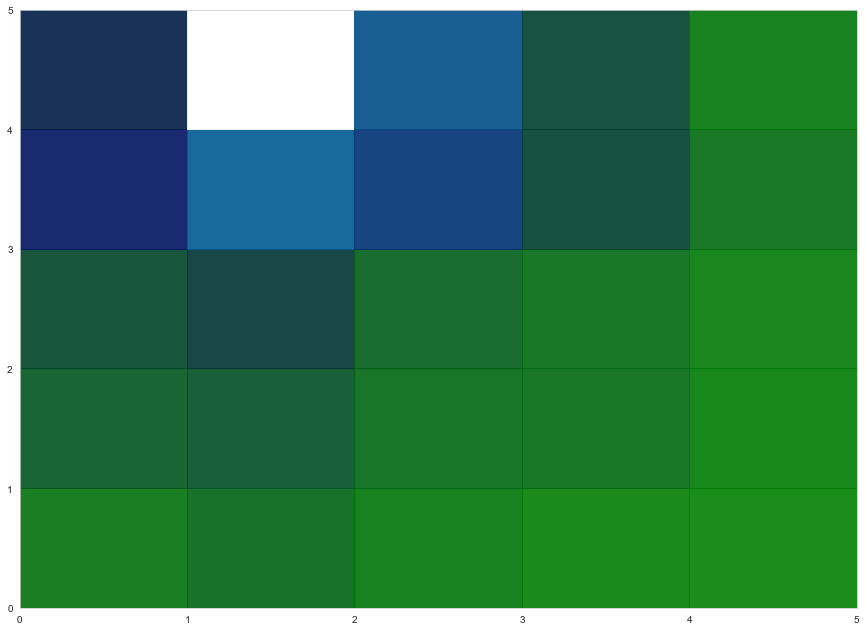

In [123]:
#Graficar grupor por distancia a cada eje
plt.figure(figsize=(15, 11))
plt.pcolor(red_neuronal_som.distance_map().T, cmap='ocean', alpha=.9)
plt.xticks(np.arange(x_dim + 1))
plt.yticks(np.arange(y_dim + 1))
plt.grid()
plt.show()

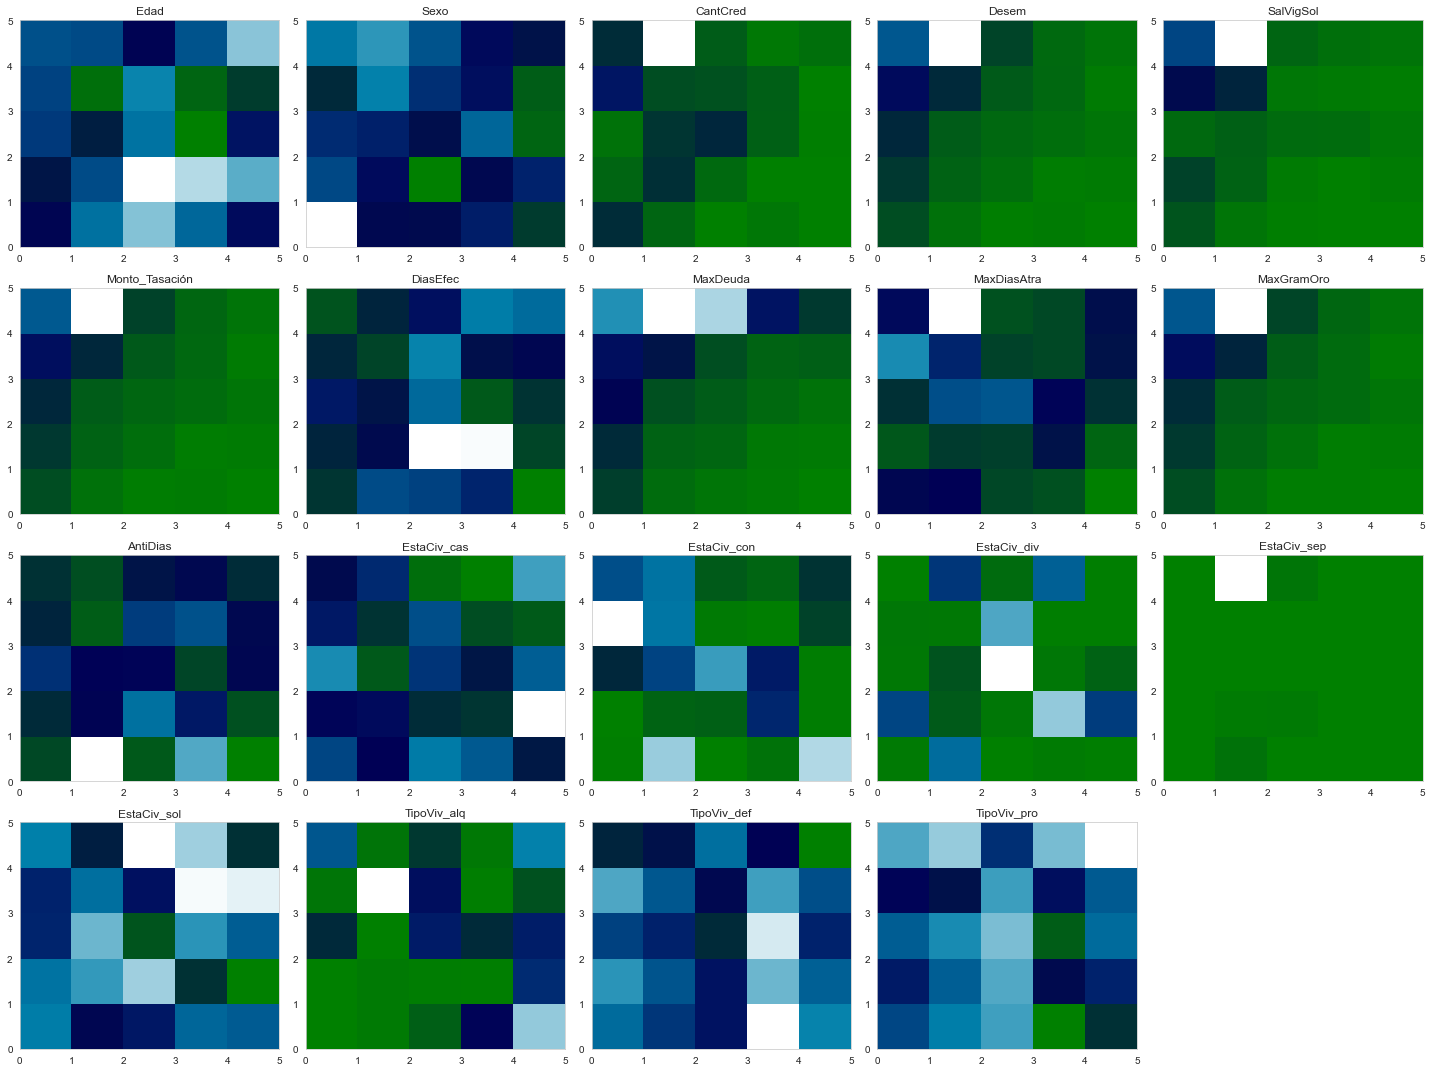

In [124]:
W = red_neuronal_som.get_weights()
plt.figure(figsize=(20, 15))
for i, f in enumerate(data_MLNS_soma):
    plt.subplot(4, 5, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='ocean')
    plt.xticks(np.arange(x_dim+1))
    plt.yticks(np.arange(y_dim+1))
plt.tight_layout()
plt.show()

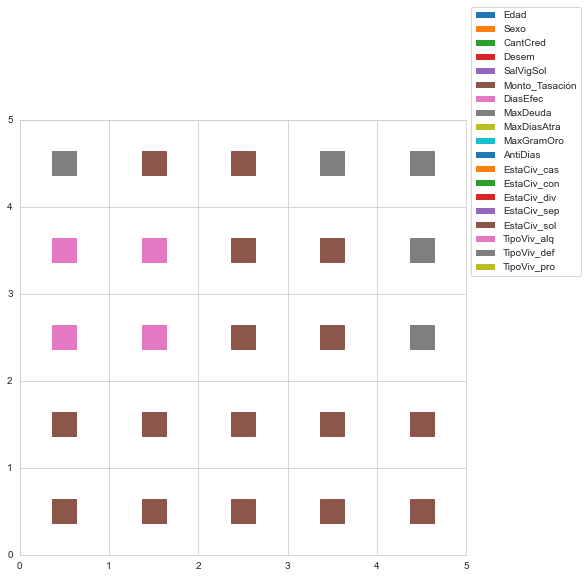

In [125]:
#Variable más representativa por cada cuadrícula
from matplotlib.patches import Patch

W = red_neuronal_som.get_weights()

Z = np.zeros((x_dim, y_dim))

plt.figure(figsize=(8, 8))
for i in np.arange(red_neuronal_som._weights.shape[0]):
    for j in np.arange(red_neuronal_som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature), marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i), edgecolor='w', label=f) for i, f in enumerate(data_MLNS_soma)]

plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
        
plt.xlim([0, x_dim])
plt.ylim([0, y_dim])
plt.show()

In [126]:
# each neuron represents a cluster
winner_coordinates = np.array([red_neuronal_som.winner(x) for x in df_array]).T
# with np.ravel_multi_index we convert the bidimensional coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, (x_dim,y_dim))

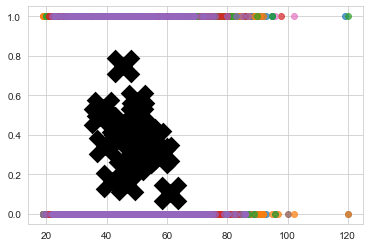

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(df_array[cluster_index == c, 0],
                df_array[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in red_neuronal_som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')

In [128]:
display(cluster_index)

array([21, 20, 20, ..., 20, 17, 22], dtype=int64)

In [129]:
data_MLNS_soma['Cuadrante'] = cluster_index

In [130]:
data_MLNS['Cuadrante'] = cluster_index

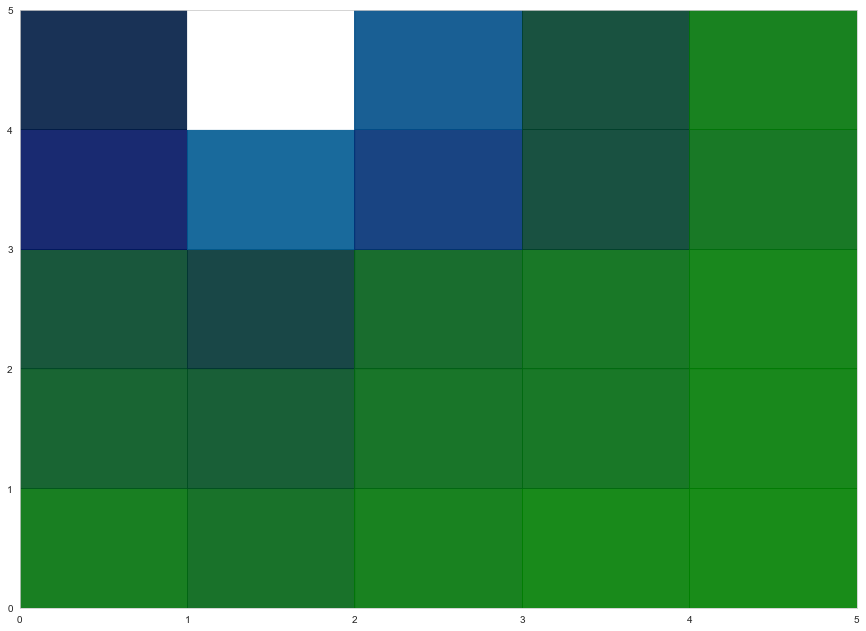

In [131]:
plt.figure(figsize=(15, 11))
plt.pcolor(red_neuronal_som.distance_map().T, cmap='ocean', alpha=.9)
plt.xticks(np.arange(x_dim + 1))
plt.yticks(np.arange(y_dim + 1))
plt.grid()
plt.show()

In [132]:
#Se agrupa contando de la esquina inferior izquierda como cero en sentido hacia arriba y despúes a la derecha
def Cluster(x):
  if x in [0,5,10,11,15,16,17,20,21,22,23,24]:
    return 1
  if x in [1,2,6,7,12,18,19]:
    return 2
  if x in [3,4,13]:
    return 3
  if x in [8,9,14]:
    return 4

In [133]:
data_MLNS_soma['Cluster0']= data_MLNS_soma['Cuadrante'].apply(lambda x: Cluster(x))

In [134]:
data_MLNS['SOM_labels']= data_MLNS['Cuadrante'].apply(lambda x: Cluster(x))

In [135]:
data_MLNS_soma.groupby('Cluster0').agg({
        'Cluster0':'count',
        'Edad':['mean','median'],
        'Sexo':['mean','median'],
        'CantCred':['mean','median'],
        'Desem':['mean','median'],
        'SalVigSol':['mean','median'],
        'Monto_Tasación':['mean','median'],
        'DiasEfec':['mean','median'],
        'MaxDeuda':['mean','median'],
        'MaxDiasAtra':['mean','median'],
        'MaxGramOro':['mean','median'],
        'AntiDias':['mean','median'],
        'EstaCiv_cas':['mean','median'],
        'EstaCiv_con':['mean','median'],
        'EstaCiv_div':['mean','median'],
        'EstaCiv_sep':['mean','median'],
        'EstaCiv_sol':['mean','median'],
        'TipoViv_alq':['mean','median'],
        'TipoViv_def':['mean','median'],
        'TipoViv_pro':['mean','median'],
        #'Actividad Laboral': lambda x: x.value_counts().index[0],
        #'Estado Civil': lambda x: x.value_counts().index[0],
        #'Nivel Educacional': lambda x: x.value_counts().index[0],
        #'Tiene Mora': lambda x: x.value_counts().index[0],
        #'Saldo Medio Anual':['mean','median'],
        #'Tiene Crédito Hipotecario': lambda x: x.value_counts().index[0],
        #'Tiene Crédito de Consumo': lambda x: x.value_counts().index[0],
        #'Medio de Contacto Preferente': lambda x: x.value_counts().index[0],
        #'Contactos con su Ejecutivo':['mean','median'],
        #'Tiene Inversiones': lambda x: x.value_counts().index[0]
    }
).reset_index().T

0            1            2            3
Cluster0                   1.000000     2.000000     3.000000     4.000000
               count   24548.000000  3748.000000   838.000000   388.000000
Edad           mean       45.853960    46.486926    49.473747    46.876289
               median     44.000000    45.000000    49.000000    45.000000
Sexo           mean        0.337543     0.343116     0.329356     0.373711
               median      0.000000     0.000000     0.000000     0.000000
CantCred       mean        1.091128     1.422892     1.519093     1.912371
               median      1.000000     1.000000     1.000000     1.000000
Desem          mean      699.354068  2367.142231  5295.129344  7134.100464
               median    524.000000  2013.440000  2969.100000  5512.625000
SalVigSol      mean      530.379467  1797.380312  3739.812041  6392.727629
               median    356.875000  1759.690000  1236.185000  5142.290000
Monto_Tasación mean      857.363947  2904.715242  6523.047643  8625.524629
               median    652.500000  2482.950000  3644.530000  6600.675000
DiasEfec       mean      629.816649   810.207179  1304.557206   880.083674
               median    334.000000   577.000000   983.000000   515.000000
MaxDeuda       mean      956.414266  3012.998799  5156.443496  9136.274974
               median    696.075000  2187.050000  3266.725000  6269.155000
MaxDiasAtra    mean       16.668405    21.266542    24.127685    29.930412
               median     16.000000    19.000000    20.000000    21.000000
MaxGramOro     mean        6.350669    19.671612    40.896153    55.667037
               median      4.855400    16.650000    24.750000    40.398300
AntiDias       mean      308.623432   287.669691   405.331742   215.314433
               median    162.000000   189.000000   285.500000   118.500000
EstaCiv_cas    mean        0.247230     0.275080     0.318616     0.260309
               median      0.000000     0.000000     0.000000     0.000000
EstaCiv_con    mean        0.046766     0.040288     0.036993     0.036082
               median      0.000000     0.000000     0.000000     0.000000
EstaCiv_div    mean        0.012139     0.017609     0.032220     0.015464
               median      0.000000     0.000000     0.000000     0.000000
EstaCiv_sep    mean        0.001874     0.001601     0.001193     0.002577
               median      0.000000     0.000000     0.000000     0.000000
EstaCiv_sol    mean        0.675615     0.648613     0.590692     0.662371
               median      1.000000     1.000000     1.000000     1.000000
TipoViv_alq    mean        0.056339     0.053629     0.034606     0.069588
               median      0.000000     0.000000     0.000000     0.000000
TipoViv_def    mean        0.541999     0.486926     0.430788     0.453608
               median      1.000000     0.000000     0.000000     0.000000
TipoViv_pro    mean        0.400277     0.456777     0.532220     0.476804
               median      0.000000     0.000000     1.000000     0.000000

### 3.6 Modelo 6 para objetivo 1: Entender el comportamiento de los clientes con el fin de que la entidad pueda generar ofertas diferenciadas, mediante una solución analítica.

### KMEANS
K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática.

El algoritmo consta de tres pasos:

1. Inicialización: una vez escogido el número de grupos, k, se establecen k centroides en el espacio de los datos, por ejemplo, escogiéndolos aleatoriamente.
2. Asignación objetos a los centroides: cada objeto de los datos es asignado a su centroide más cercano.
3. Actualización centroides: se actualiza la posición del centroide de cada grupo tomando como nuevo centroide la posición del promedio de los objetos pertenecientes a dicho grupo.
![Imagen](https://www.unioviedo.es/compnum/laboratorios_py/new/d1.png)

In [136]:
#Importamos las librerias
#import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler     ## Transformar variables
from sklearn.decomposition import PCA               ## Componentes principales
from sklearn.mixture import GaussianMixture          ## Elección del número de cluster por BIC y AIC

In [137]:
## Se eliminan las variables que no ingresan al cluster
data_MLNS.drop(['Cuadrante'],axis=1,inplace=True) #'Cluster0'

In [138]:
#Base a usar para la clusterización:  data_MLNS
data_MLNS.info

<bound method DataFrame.info of        Edad  Sexo  CantCred    Desem  SalVigSol  Monto_Tasación  DiasEfec  \
0      66.0   0.0       1.0   561.16     277.03          587.60      77.0   
1      67.0   0.0       1.0   335.22     331.66          351.02     181.0   
2      56.0   0.0       1.0   180.12     176.69          188.61     123.0   
3      59.0   0.0       1.0   107.92     107.92          113.00      14.0   
4      50.0   1.0       1.0   308.95     308.95          393.24      16.0   
...     ...   ...       ...      ...        ...             ...       ...   
29517  46.0   1.0       2.0   615.00     605.34          769.38    1358.5   
29518  45.0   0.0       1.0   455.00     451.30          568.81     821.0   
29519  43.0   1.0       1.0   239.00     229.29          299.37     280.0   
29520  41.0   1.0       2.0  1810.00    1774.37         1985.83     279.0   
29521  43.0   1.0       1.0  1000.05    1000.05         1097.69      61.0   

       MaxDeuda  MaxDiasAtra  MaxGramOro  A

In [139]:
data_MLNS.head()

,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,MaxGramOro,AntiDias,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro,SOM_labels
0,66.0,0.0,1.0,561.16,277.03,587.60,77.0,527.90,21.0,9.7500,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,67.0,0.0,1.0,335.22,331.66,351.02,181.0,315.35,21.0,5.8250,56.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,56.0,0.0,1.0,180.12,176.69,188.61,123.0,178.73,8.0,3.1333,52.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,59.0,0.0,1.0,107.92,107.92,113.00,14.0,104.89,2.0,1.8750,14.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,50.0,1.0,1.0,308.95,308.95,393.24,16.0,300.27,12.0,6.5250,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [140]:
## generamos un array con las variables
X = np.array(data_MLNS[["Edad","Sexo","CantCred","Desem","SalVigSol","Monto_Tasación","DiasEfec","MaxDeuda","MaxDiasAtra","MaxGramOro","AntiDias","EstaCiv_cas","EstaCiv_con","EstaCiv_div","EstaCiv_sep","EstaCiv_sol","TipoViv_alq","TipoViv_def","TipoViv_pro"]])
X.shape

(29522, 19)

In [141]:
## generamos el algoritmo de cluster
kmeans = KMeans(n_clusters=5)

In [142]:
## ingresamos el array al algoritmo
kmeans.fit(X)

KMeans(n_clusters=5)

### Centroides

In [143]:
## centroides del cluster: son los promedio de las observaciones en cada cluster por cada variable
kmeans.cluster_centers_

array([[4.73021727e+01, 3.21898228e-01, 1.31189251e+00, 1.69794261e+03,
        1.27125481e+03, 2.08299055e+03, 9.90591366e+02, 2.25375056e+03,
        2.02176958e+01, 1.42937319e+01, 3.19717982e+02, 2.86735277e-01,
        3.83076043e-02, 1.85820469e-02, 1.42938822e-03, 6.35791881e-01,
        5.56032018e-02, 4.92424242e-01, 4.50257290e-01],
       [4.55244479e+01, 3.43343246e-01, 1.05318578e+00, 5.18083147e+02,
        3.77047896e+02, 6.36136230e+02, 5.41676343e+02, 6.82125951e+02,
        1.59920051e+01, 4.94156096e+00, 3.06425779e+02, 2.38970409e-01,
        4.87008239e-02, 1.03836591e-02, 1.90123336e-03, 6.84249013e-01,
        5.58670112e-02, 5.52478916e-01, 3.90191586e-01],
       [4.62645161e+01, 3.80645161e-01, 1.89354839e+00, 9.82694968e+03,
        8.48703448e+03, 1.19406228e+04, 7.78680553e+02, 1.02622499e+04,
        2.89935484e+01, 7.47850610e+01, 2.19641935e+02, 2.54838710e-01,
        3.87096774e-02, 1.29032258e-02, 3.22580645e-03, 6.80645161e-01,
        5.16129032e-02

In [144]:
## Etiquetas de cada observación, esto se logra con los centroides
kmeans.labels_

array([1, 1, 1, ..., 1, 0, 1])

In [145]:
## Se convierte en un DataFrame el X y se le agrega etiquetas
column_names = ["Edad","Sexo","CantCred","Desem","SalVigSol","Monto_Tasación","DiasEfec","MaxDeuda",
                "MaxDiasAtra","MaxGramOro","AntiDias","EstaCiv_cas","EstaCiv_con","EstaCiv_div",
                "EstaCiv_sep","EstaCiv_sol","TipoViv_alq","TipoViv_def","TipoViv_pro"]
data_MLNS_real=pd.DataFrame(X,columns=column_names)
# convert all columns of DataFrame
data_MLNS_real = data_MLNS_real.apply(pd.to_numeric) # convert all columns of DataFrame
data_MLNS_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29522 entries, 0 to 29521
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Edad            29522 non-null  float64
 1   Sexo            29522 non-null  float64
 2   CantCred        29522 non-null  float64
 3   Desem           29522 non-null  float64
 4   SalVigSol       29522 non-null  float64
 5   Monto_Tasación  29522 non-null  float64
 6   DiasEfec        29522 non-null  float64
 7   MaxDeuda        29522 non-null  float64
 8   MaxDiasAtra     29522 non-null  float64
 9   MaxGramOro      29522 non-null  float64
 10  AntiDias        29522 non-null  float64
 11  EstaCiv_cas     29522 non-null  float64
 12  EstaCiv_con     29522 non-null  float64
 13  EstaCiv_div     29522 non-null  float64
 14  EstaCiv_sep     29522 non-null  float64
 15  EstaCiv_sol     29522 non-null  float64
 16  TipoViv_alq     29522 non-null  float64
 17  TipoViv_def     29522 non-null 

In [146]:
## A cada observación en la data se le coloca las equiquetas del cluster
data_MLNS_re = pd.concat([data_MLNS_real,pd.DataFrame({'kmeans_labels':kmeans.labels_})],axis=1)


In [147]:
data_MLNS_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29522 entries, 0 to 29521
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Edad            29522 non-null  float64
 1   Sexo            29522 non-null  float64
 2   CantCred        29522 non-null  float64
 3   Desem           29522 non-null  float64
 4   SalVigSol       29522 non-null  float64
 5   Monto_Tasación  29522 non-null  float64
 6   DiasEfec        29522 non-null  float64
 7   MaxDeuda        29522 non-null  float64
 8   MaxDiasAtra     29522 non-null  float64
 9   MaxGramOro      29522 non-null  float64
 10  AntiDias        29522 non-null  float64
 11  EstaCiv_cas     29522 non-null  float64
 12  EstaCiv_con     29522 non-null  float64
 13  EstaCiv_div     29522 non-null  float64
 14  EstaCiv_sep     29522 non-null  float64
 15  EstaCiv_sol     29522 non-null  float64
 16  TipoViv_alq     29522 non-null  float64
 17  TipoViv_def     29522 non-null 

In [148]:
#Para comparar después
data_MLNS = pd.concat([data_MLNS,pd.DataFrame({'kmeans_labels':kmeans.labels_})],axis=1)

In [149]:
data_MLNS

,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,MaxGramOro,...,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro,SOM_labels,kmeans_labels
0,66.0,0.0,1.0,561.16,277.03,587.60,77.0,527.90,21.0,9.7500,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
1,67.0,0.0,1.0,335.22,331.66,351.02,181.0,315.35,21.0,5.8250,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,56.0,0.0,1.0,180.12,176.69,188.61,123.0,178.73,8.0,3.1333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1
3,59.0,0.0,1.0,107.92,107.92,113.00,14.0,104.89,2.0,1.8750,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
4,50.0,1.0,1.0,308.95,308.95,393.24,16.0,300.27,12.0,6.5250,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29517,46.0,1.0,2.0,615.00,605.34,769.38,1358.5,591.60,27.0,5.7825,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1
29518,45.0,0.0,1.0,455.00,451.30,568.81,821.0,455.00,20.0,4.2750,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1
29519,43.0,1.0,1.0,239.00,229.29,299.37,280.0,239.00,5.0,2.2500,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1
29520,41.0,1.0,2.0,1810.00,1774.37,1985.83,279.0,980.00,25.0,14.9250,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0


In [150]:
data_MLNS_re

,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,MaxGramOro,AntiDias,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro,kmeans_labels
0,66.0,0.0,1.0,561.16,277.03,587.60,77.0,527.90,21.0,9.7500,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,67.0,0.0,1.0,335.22,331.66,351.02,181.0,315.35,21.0,5.8250,56.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,56.0,0.0,1.0,180.12,176.69,188.61,123.0,178.73,8.0,3.1333,52.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,59.0,0.0,1.0,107.92,107.92,113.00,14.0,104.89,2.0,1.8750,14.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,50.0,1.0,1.0,308.95,308.95,393.24,16.0,300.27,12.0,6.5250,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29517,46.0,1.0,2.0,615.00,605.34,769.38,1358.5,591.60,27.0,5.7825,248.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
29518,45.0,0.0,1.0,455.00,451.30,568.81,821.0,455.00,20.0,4.2750,61.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
29519,43.0,1.0,1.0,239.00,229.29,299.37,280.0,239.00,5.0,2.2500,309.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
29520,41.0,1.0,2.0,1810.00,1774.37,1985.83,279.0,980.00,25.0,14.9250,325.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [151]:
## Se cuentan los valores por cada cluster: se puede observar que los cluster son asimétricos, esto se debe a los 
## puntos extremos, debería mejorar con el tratamiento de datos
data_MLNS_re['kmeans_labels'].value_counts()

1    20520
0     6993
4     1663
2      310
3       36
Name: kmeans_labels, dtype: int64

In [152]:
## Calculamos los promedios por cada Cluster
data_MLNS_re.groupby('kmeans_labels').mean()

,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,MaxGramOro,AntiDias,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro
kmeans_labels,,,,,,,,,,,,,,,,,,,
0,47.309166,0.321893,1.312026,1699.286002,1272.712400,2084.634036,990.802259,2254.952543,20.218361,14.302060,319.459888,0.287001,0.038324,0.018590,0.001430,0.635493,0.055627,0.492492,0.450164
1,45.521832,0.343372,1.053314,518.321576,377.210096,636.420584,541.669777,682.348839,15.994250,4.944258,306.482359,0.238938,0.048684,0.010380,0.001901,0.684308,0.055848,0.552485,0.390205
2,46.264516,0.380645,1.893548,9826.949677,8487.034484,11940.622823,778.680553,10262.249903,28.993548,74.785061,219.641935,0.254839,0.038710,0.012903,0.003226,0.680645,0.051613,0.429032,0.519355
3,51.083333,0.416667,4.027778,26807.899167,23763.206389,32037.944417,1030.205128,17321.423889,59.861111,206.807481,299.083333,0.305556,0.055556,0.055556,0.027778,0.527778,0.055556,0.416667,0.527778
4,47.132291,0.338545,1.570655,4037.665412,3153.212441,4963.502770,968.048480,5448.707877,24.042694,32.108407,286.005412,0.281419,0.037883,0.028863,0.001804,0.632592,0.052315,0.443776,0.501503


In [153]:
data_MLNS_re.groupby('kmeans_labels').var()

,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,MaxGramOro,AntiDias,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro
kmeans_labels,,,,,,,,,,,,,,,,,,,
0,202.401828,0.218309,0.506745,4.310383e+05,4.985583e+05,6.458726e+05,913872.843782,1.202959e+06,276.849194,49.368517,167893.830520,0.204661,0.036861,0.018247,0.001428,0.231675,0.052540,0.249979,0.247552
1,198.846641,0.225479,0.064315,8.157465e+04,7.022681e+04,1.252396e+05,424782.698192,2.025681e+05,121.287749,9.041448,320350.950320,0.181855,0.046316,0.010273,0.001897,0.216041,0.052732,0.247257,0.237957
2,180.454077,0.236517,2.885072,7.855478e+06,1.106869e+07,1.167569e+07,643786.323644,3.223413e+07,1295.488631,773.198147,69049.169110,0.190510,0.037332,0.012778,0.003226,0.218071,0.049107,0.245756,0.250433
3,161.792857,0.250000,9.342063,6.531421e+07,5.425921e+07,8.976334e+07,895782.486221,8.013100e+07,2592.180159,7491.935672,139504.192857,0.218254,0.053968,0.053968,0.027778,0.256349,0.053968,0.250000,0.256349
4,192.830864,0.224067,1.165733,2.081495e+06,2.454707e+06,3.320520e+06,912124.097242,9.181802e+06,516.676275,221.548375,134463.785169,0.202344,0.036470,0.028047,0.001802,0.232559,0.049608,0.246987,0.250148


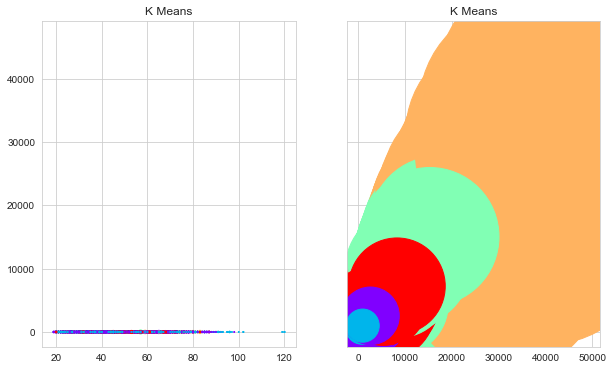

In [154]:
f, (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2],c=kmeans.labels_,cmap='rainbow')
ax2.set_title('K Means')
ax2.scatter(X[:, 3], X[:, 4], X[:, 5],c=kmeans.labels_,cmap='rainbow');

### 3 componentes principales

In [155]:
#from sklearn.decomposition import PCA

In [156]:
pca = PCA(n_components=3)

In [157]:
pca.fit(X)

PCA(n_components=3)

In [158]:
x_pca = pca.transform(X)

In [159]:
X.shape #Original

(29522, 19)

In [160]:
x_pca.shape  #Con 3 componentes principales

(29522, 3)

### 5means 3 componentes principales

In [161]:
kmeans = KMeans(n_clusters=5)

In [162]:
kmeans.fit(x_pca)

KMeans(n_clusters=5)

### Centroides

In [163]:
kmeans.cluster_centers_
### El segundo cluster presenta la mayor cantidad de clientes 
### cluster 2: 2do componente 

array([[-1.29425660e+03, -1.44543174e+02,  6.00597743e+01],
       [ 1.80652910e+04, -5.95966993e+01,  5.26693547e+02],
       [ 1.37523264e+03,  2.60070021e+02, -2.24443172e+02],
       [ 6.61890582e+03,  1.01003628e+03,  6.55371746e+01],
       [ 4.79186279e+04, -8.91722829e+03,  3.75215221e+01]])

In [164]:
kmeans.labels_

array([0, 0, 0, ..., 0, 2, 0])

C:\Users\Mauro\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


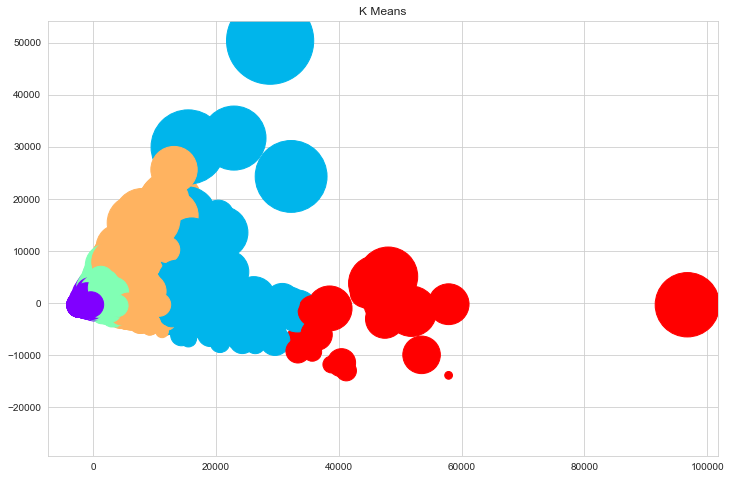

In [165]:
f, (ax1_pca) = plt.subplots(1, sharey=True,figsize=(12,8))
ax1_pca.set_title('K Means')
ax1_pca.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2],c=kmeans.labels_,cmap='rainbow');

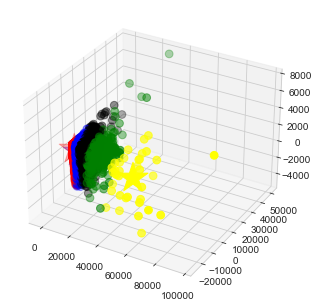

In [166]:
from mpl_toolkits.mplot3d import Axes3D
# Predicting the clusters
labels = kmeans.predict(x_pca)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','black','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000);

In [167]:
copy =  pd.DataFrame()
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,20819
1,green,305
2,blue,6777
3,black,1585
4,yellow,36


In [168]:
pca.components_
###En esta matriz numerosa, cada fila representa un componente principal y cada columna
###se relaciona con las características originales.

array([[ 1.36770727e-04,  7.38510045e-07,  5.94132470e-05,
         4.87713418e-01,  4.12100452e-01,  5.92326102e-01,
         3.44420338e-02,  4.90148821e-01,  9.15152804e-04,
         3.75875671e-03, -3.39419510e-03,  3.53942909e-06,
        -7.85461681e-07,  1.14301361e-06,  1.41240026e-07,
        -4.18522477e-06, -9.82575286e-08, -8.49231792e-06,
         8.58088590e-06],
       [ 2.96811717e-04, -1.43090515e-05, -1.00080584e-04,
        -2.59736164e-01, -2.86637384e-01, -3.04788664e-01,
         1.50736567e-01,  8.57168948e-01, -1.49251163e-03,
        -2.20686587e-03, -3.56247279e-03,  8.06387077e-06,
        -1.52149468e-06,  1.21532596e-06, -5.63614745e-07,
        -8.18118477e-06, -8.27426956e-07, -1.12733633e-05,
         1.22050039e-05],
       [-4.41203597e-03,  7.44893584e-05, -1.49331165e-04,
        -7.11613350e-02,  1.18365322e-01, -9.33304074e-02,
        -9.32553712e-01,  1.47642015e-01, -2.92258600e-03,
         3.56255978e-04, -2.84134440e-01, -6.78780551e-05,
    

In [169]:
data_MLNS.keys()

Index(['Edad', 'Sexo', 'CantCred', 'Desem', 'SalVigSol', 'Monto_Tasación',
       'DiasEfec', 'MaxDeuda', 'MaxDiasAtra', 'MaxGramOro', 'AntiDias',
       'EstaCiv_cas', 'EstaCiv_con', 'EstaCiv_div', 'EstaCiv_sep',
       'EstaCiv_sol', 'TipoViv_alq', 'TipoViv_def', 'TipoViv_pro',
       'SOM_labels', 'kmeans_labels'],
      dtype='object')

In [170]:
df_comp = pd.DataFrame(pca.components_,columns=['Edad', 'Sexo', 'CantCred', 'Desem', 'SalVigSol', 'Monto_Tasación',
       'DiasEfec', 'MaxDeuda', 'MaxDiasAtra', 'MaxGramOro', 'AntiDias',
       'EstaCiv_cas', 'EstaCiv_con', 'EstaCiv_div', 'EstaCiv_sep',
       'EstaCiv_sol', 'TipoViv_alq', 'TipoViv_def', 'TipoViv_pro'])
df_comp
### Contribución de cada variable a los componentes respectivos

,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,MaxGramOro,AntiDias,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro
0,0.000137,7.385100e-07,0.000059,0.487713,0.412100,0.592326,0.034442,0.490149,0.000915,0.003759,-0.003394,0.000004,-7.854617e-07,0.000001,1.412400e-07,-0.000004,-9.825753e-08,-0.000008,0.000009
1,0.000297,-1.430905e-05,-0.000100,-0.259736,-0.286637,-0.304789,0.150737,0.857169,-0.001493,-0.002207,-0.003562,0.000008,-1.521495e-06,0.000001,-5.636147e-07,-0.000008,-8.274270e-07,-0.000011,0.000012
2,-0.004412,7.448936e-05,-0.000149,-0.071161,0.118365,-0.093330,-0.932554,0.147642,-0.002923,0.000356,-0.284134,-0.000068,-2.028842e-07,-0.000004,-1.139840e-06,0.000084,1.944570e-05,0.000038,-0.000057


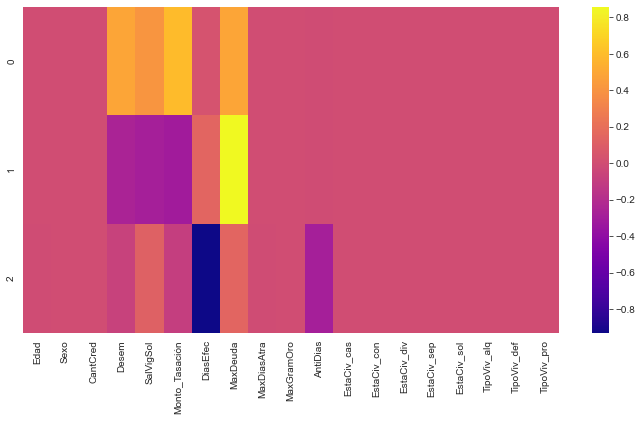

In [171]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',);
### A que componenetes estan asociadas las variables
### Segunda componente: Cyzone y Maquillaje

### Método del codo

### Para base en niveles

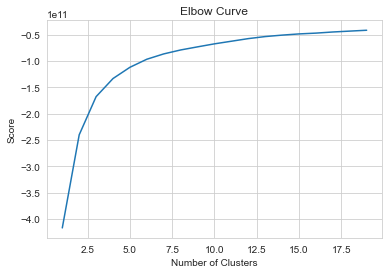

In [172]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

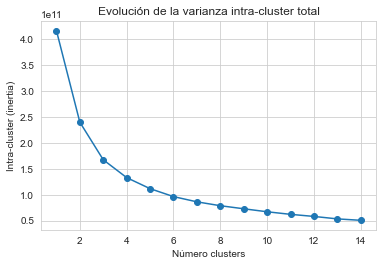

In [173]:
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(X)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');
### El número óptimo de clusters sería 4

### Para componentes principales

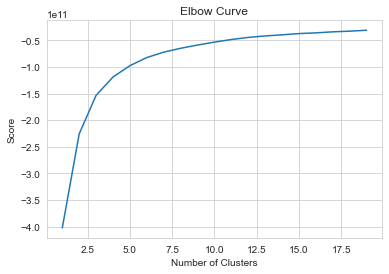

In [174]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x_pca).score(x_pca) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

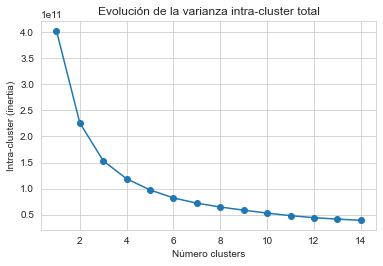

In [175]:
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(x_pca)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');
### El número óptimo de clusters sería 4

### Según AIC y BIC

In [176]:
#from sklearn.mixture import GaussianMixture

### Para base en niveles

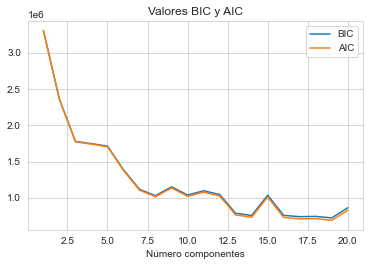

In [177]:
n_components = range(1, 21)
valores_bic = []
valores_aic = []

for i in n_components:
    modelo = GaussianMixture(n_components=i, covariance_type="full")
    modelo = modelo.fit(X)
    valores_bic.append(modelo.bic(X))
    valores_aic.append(modelo.aic(X))

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(n_components, valores_bic, label='BIC')
ax.plot(n_components, valores_aic, label='AIC')
ax.set_title("Valores BIC y AIC")
ax.set_xlabel("Número componentes")
ax.legend();

In [178]:
print(f"Número óptimo acorde al BIC: {range(1, 21)[np.argmin(valores_bic)]}")
print(f"Número óptimo acorde al AIC: {range(1, 21)[np.argmin(valores_aic)]}")

Número óptimo acorde al BIC: 19
Número óptimo acorde al AIC: 19


### Para componentes principales

C:\Users\Mauro\AppData\Roaming\Python\Python38\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\Mauro\AppData\Roaming\Python\Python38\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\Mauro\AppData\Roaming\Python\Python38\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


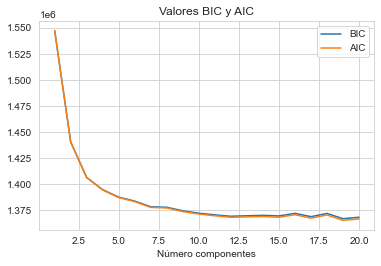

In [179]:
n_components = range(1, 21)
valores_bic = []
valores_aic = []

for i in n_components:
    modelo = GaussianMixture(n_components=i, covariance_type="full")
    modelo = modelo.fit(x_pca)
    valores_bic.append(modelo.bic(x_pca))
    valores_aic.append(modelo.aic(x_pca))

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(n_components, valores_bic, label='BIC')
ax.plot(n_components, valores_aic, label='AIC')
ax.set_title("Valores BIC y AIC")
ax.set_xlabel("Número componentes")
ax.legend();

In [180]:
print(f"Número óptimo acorde al BIC: {range(1, 21)[np.argmin(valores_bic)]}")
print(f"Número óptimo acorde al AIC: {range(1, 21)[np.argmin(valores_aic)]}")

Número óptimo acorde al BIC: 19
Número óptimo acorde al AIC: 19


Según el criterio de AIC/BIC nos recomiendo una cantidad excesiva de clusters, lo cual es razonable ya que así disminuye su error.

### 3.7 Modelo 7 para objetivo 1: Entender el comportamiento de los clientes con el fin de que la entidad pueda generar ofertas diferenciadas, mediante una solución analítica.

### Gaussian Mixture Model
En esta Sección presentamos formalmente los modelos Gaussianos Mixtos.

Sea X = {X1,X2,…,Xn} una muestra i.i.d. proveniente de una distribución de probabilidad mixta de K componentes, definida por:

f(xi|π,θ)=∑k=1Kπkϕk(x|θk).
Donde

K es el número de clusters.

0<πk≤1 ∀k∈{1,…,K} y ∑Kk=1πk=1.

θk es el conjunto de parámetros de la función de la k- ésima función de densidad.

A πk lo interpretamos como la probabilidad de que la observación Xi provenga de la densidad ϕk.

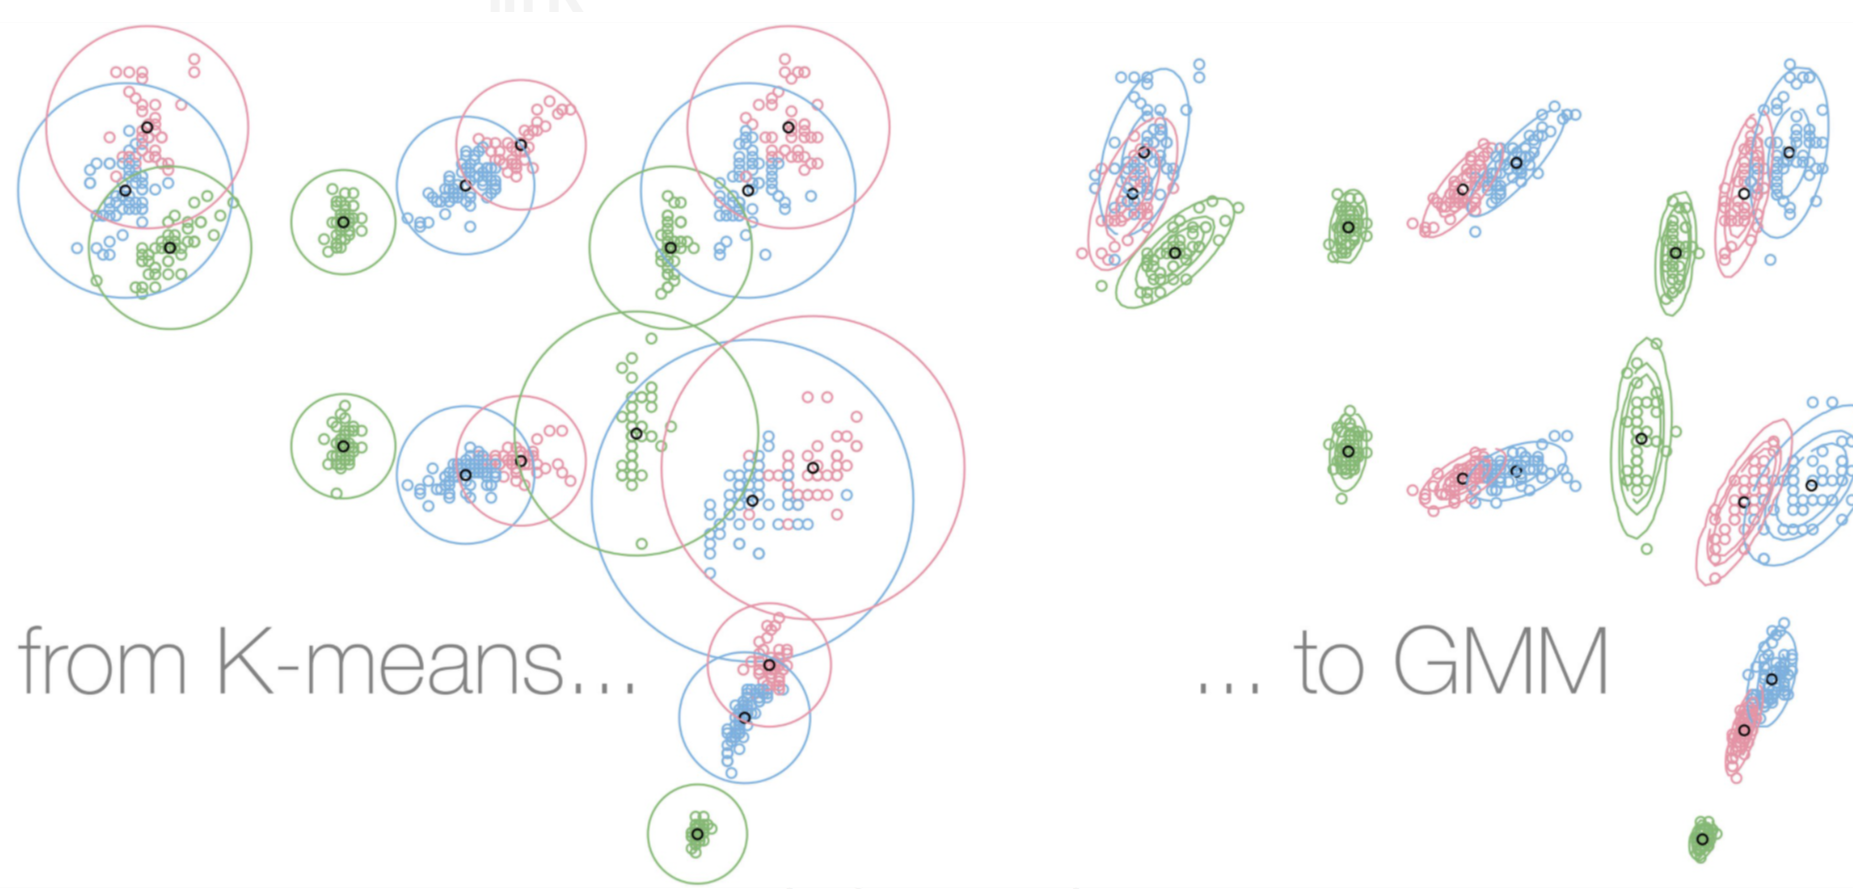

In [181]:
#Importamos librerias
import numpy as np
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#import matplotlib.pyplot as plt
#import matplotlib.cm as cm
#import numpy as np

In [182]:
## generamos un array con las variables
X_gmm = np.array(data_MLNS[["Edad","Sexo","CantCred","Desem","SalVigSol","Monto_Tasación","DiasEfec",
                            "MaxDeuda","MaxDiasAtra","MaxGramOro","AntiDias","EstaCiv_cas","EstaCiv_con",
                            "EstaCiv_div","EstaCiv_sep","EstaCiv_sol","TipoViv_alq","TipoViv_def","TipoViv_pro"]])

### Componentes principales

In [183]:
#from sklearn.preprocessing import StandardScaler #utilizado para la estandarización

In [184]:
#Estandarización
sc=StandardScaler()
X_gmm_std=sc.fit_transform(X_gmm)

In [185]:
pca = PCA(n_components=2)
pca.fit(X_gmm)
X_gmm_std = pca.transform(X_gmm)


In [186]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=5,covariance_type="full", n_init=10, random_state=42)
gm.fit(X_gmm_std)

GaussianMixture(n_components=5, n_init=10, random_state=42)

In [187]:
X_gmm_cluster=gm.predict(X_gmm_std)

In [188]:
data_MLNS=pd.concat([data_MLNS,pd.DataFrame({'gmm_labels':X_gmm_cluster})],axis=1)
data_MLNS.head(5)

,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,MaxGramOro,...,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro,SOM_labels,kmeans_labels,gmm_labels
0,66.0,0.0,1.0,561.16,277.03,587.60,77.0,527.90,21.0,9.7500,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,2
1,67.0,0.0,1.0,335.22,331.66,351.02,181.0,315.35,21.0,5.8250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,2
2,56.0,0.0,1.0,180.12,176.69,188.61,123.0,178.73,8.0,3.1333,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,2
3,59.0,0.0,1.0,107.92,107.92,113.00,14.0,104.89,2.0,1.8750,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,2
4,50.0,1.0,1.0,308.95,308.95,393.24,16.0,300.27,12.0,6.5250,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,2


In [189]:
data_MLNS['gmm_labels'].value_counts()

0    11505
2     9893
1     6068
4     1727
3      329
Name: gmm_labels, dtype: int64

In [190]:
data_MLNS['SOM_labels'].value_counts()

1    24548
2     3748
3      838
4      388
Name: SOM_labels, dtype: int64

In [191]:
data_MLNS['kmeans_labels'].value_counts()

1    20520
0     6993
4     1663
2      310
3       36
Name: kmeans_labels, dtype: int64

Grafiquemos las fronteras de decisión y los contornos de densidad obtenidos por el modelo.

In [192]:
from matplotlib.colors import LogNorm

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)
    
def plot_gaussian_mixture(clusterer, X_gmm_std, resolution=1000, show_ylabels=True):
    mins = X_gmm_std.min(axis=0) - 0.1
    maxs = X_gmm_std.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='w', linestyles='dashed')
    
    plt.plot(X_gmm_std[:, 0], X_gmm_std[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
def compare_gaussian_mixtures(gm1, gm2, X_gmm_std):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X_gmm_std)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X_gmm_std, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

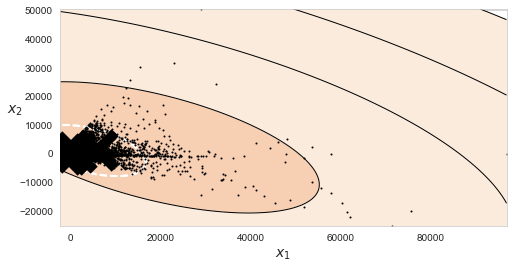

In [193]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X_gmm_std)
plt.show()

Como se vió en clase, es posible restringir las matrices de covarianza usando el parámetro covariance_type:

* "full" (por defecto): sin restricción, los clusters pueden tomar cualquier forma elipsoidal.
* "tied": los clusters deben tener la misma forma que puede ser cualquier elipsoide.
* "spherical": los clusters deben ser esféricos, solo varía el diámetro.
* "diag": los clusters pueden tener cualquier forma elipsoidal pero los ejes de la elipse deben ser paralelos a los ejes.

In [194]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)

gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)

gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)

gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)

gm_full.fit(X_gmm_std)
gm_tied.fit(X_gmm_std)
gm_spherical.fit(X_gmm_std)
gm_diag.fit(X_gmm_std)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

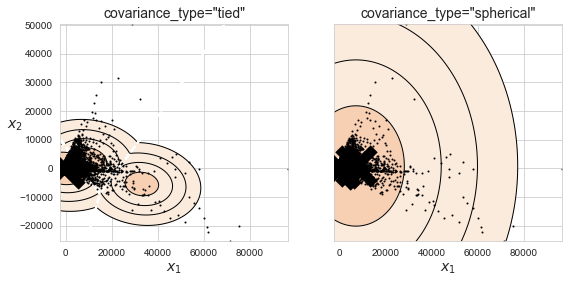

In [195]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X_gmm_std)
plt.show()

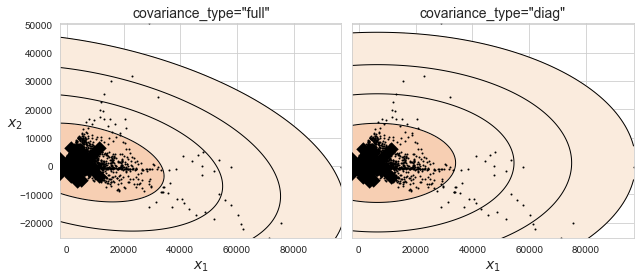

In [196]:
compare_gaussian_mixtures(gm_full, gm_diag, X_gmm_std)
plt.tight_layout()
plt.show()

### Detección de anomalías usando GMM

GMM puede usarse para detectar anomalías, basta explorar las instancias ubicadas en zonas de baja densidad. Se debe definir un límite de densidad para diferenciar una anomalía. Por ejemplo, si se conoce que 4% es la tasa de productos defectuosos en una fábrica, se puede usar como límite el valor de densidad que mantenga el 4% de instancias fuera.

In [197]:
# Cálculo del límite de densidad que permite descartar el 4% de las instancias.
densities = gm.score_samples(X_gmm_std)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

Podemos imprimir las anomalías respecto a las fronteras de decisión y los contornos de densidad obtenidos por el modelo.

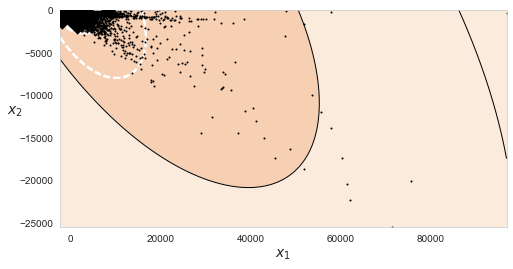

In [198]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X_gmm_std)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='b', marker='x')
plt.ylim(top=5.1)

plt.show()

### GMM: Métricas de evaluación

Las métricas de evaluación revisadas para el algoritmo GMM son Bayesian information criterion (BIC) y Akaike information criterion (AIC). Se utilizarán estas métricas para detectar gráficamente el mejor valor de k para el conjunto de datos trabajado previamente. También se utilizará gridsearch para encontrar el mejor valor de k y covariance_type en base a la métrica BIC.

#Entrenamiento de modelos GMM para k ∈ {1,2,3, ... ,11}

In [199]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X_gmm_std)
             for k in range(1, 11)]

In [200]:
#Calculo de métricas BIC y AIC para cada modelo.
bics = [model.bic(X_gmm_std) for model in gms_per_k]
aics = [model.aic(X_gmm_std) for model in gms_per_k]

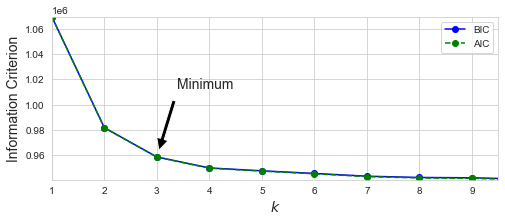

In [201]:
#Gráfica de los indicadores BIC y AIC para cada valor de k.
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [202]:
#Se utiliza gridsearch para determinar el mejor valor de k y covariance_type.
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [203]:
best_k,best_covariance_type

(10, 'full')

### Bayesian Gaussian Mixture Model

En vez de realizar una búsqueda manual del número de clusters, se puede utilizar la clase BayesianGaussianMixture. Este modelo parte de un número inicial de componentes (que debe ser mayor al número de clusters) y asigna un peso de 0 a los componentes innecesarios. Podemos volver a experimentar con el conjunto de datos asumiendo que el número de componentes es menor a 10.

In [204]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_gmm_std)

C:\Users\Mauro\AppData\Roaming\Python\Python38\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [205]:
#Si revisamos los pesos del modelo, vemos que ha descartado 2 clusters, manteniendo solo 8.
np.round(bgm.weights_, 2)

array([0.22, 0.12, 0.  , 0.05, 0.19, 0.06, 0.  , 0.03, 0.11, 0.23])

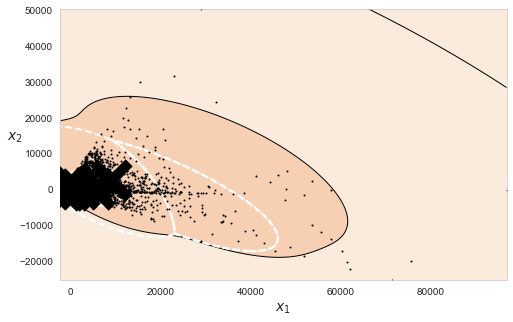

In [206]:
#Podemos graficar nuevamente las fronteras de decisión y los contornos de densidad obtenidos por el modelo.
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X_gmm_std)
plt.show()

In [207]:
data_MLNS

,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,MaxGramOro,...,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro,SOM_labels,kmeans_labels,gmm_labels
0,66.0,0.0,1.0,561.16,277.03,587.60,77.0,527.90,21.0,9.7500,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,2
1,67.0,0.0,1.0,335.22,331.66,351.02,181.0,315.35,21.0,5.8250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,2
2,56.0,0.0,1.0,180.12,176.69,188.61,123.0,178.73,8.0,3.1333,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,2
3,59.0,0.0,1.0,107.92,107.92,113.00,14.0,104.89,2.0,1.8750,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,2
4,50.0,1.0,1.0,308.95,308.95,393.24,16.0,300.27,12.0,6.5250,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29517,46.0,1.0,2.0,615.00,605.34,769.38,1358.5,591.60,27.0,5.7825,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,0
29518,45.0,0.0,1.0,455.00,451.30,568.81,821.0,455.00,20.0,4.2750,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,2
29519,43.0,1.0,1.0,239.00,229.29,299.37,280.0,239.00,5.0,2.2500,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,2
29520,41.0,1.0,2.0,1810.00,1774.37,1985.83,279.0,980.00,25.0,14.9250,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,1
